In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data(validation_only=True)

capturing graph


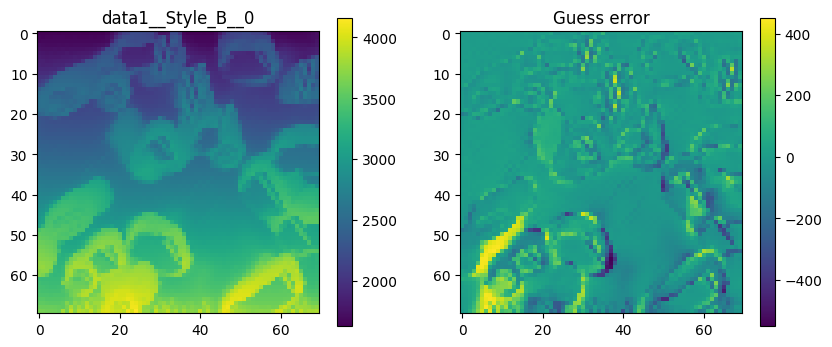

-15.0
diag 1.4260362382528039e-05
capturing graph
diag 1.4260362382528039e-05


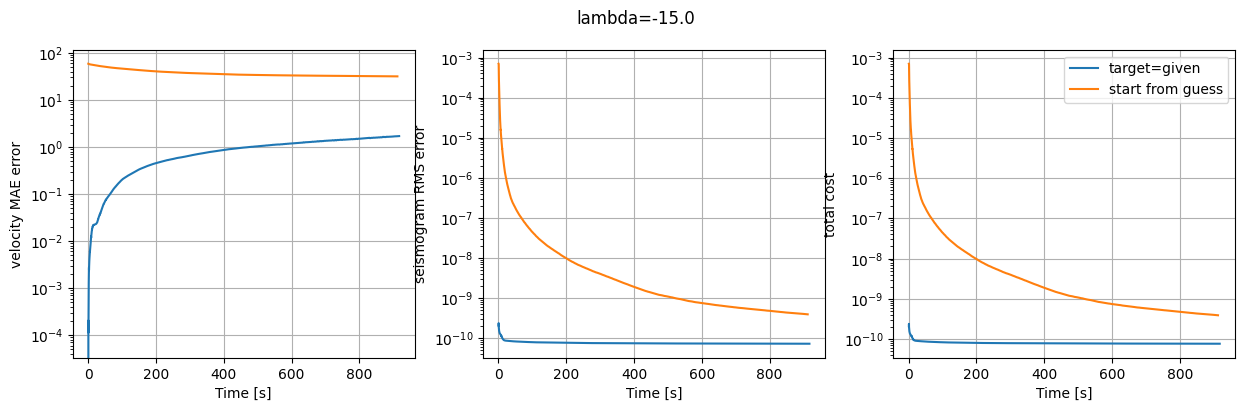

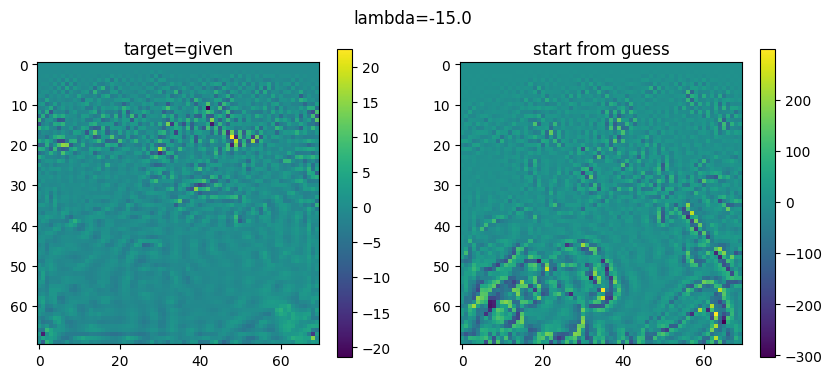

-14.0
diag 1.4260362382528039e-05
diag 1.4260362382528039e-05


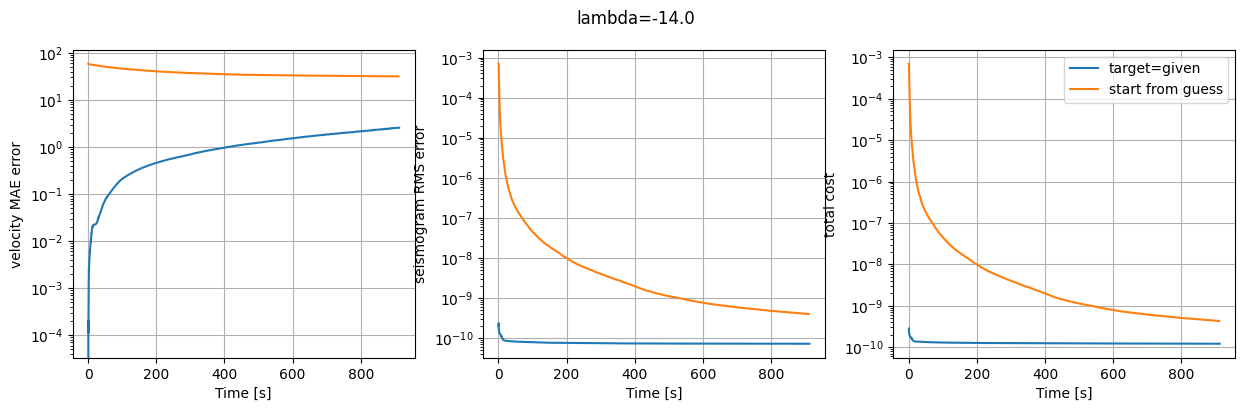

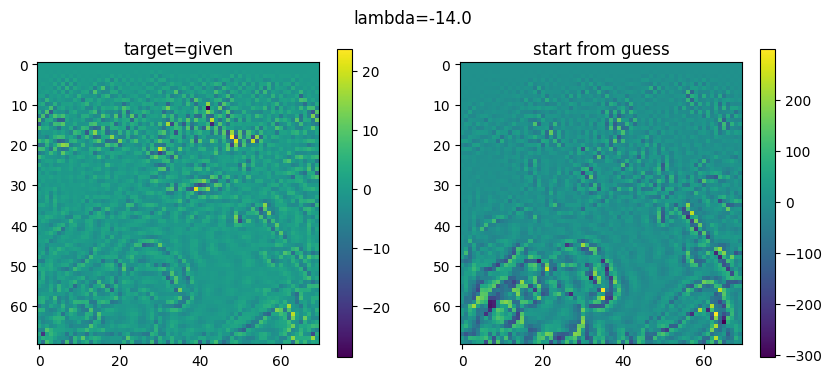

-13.0
diag 1.4260362382528039e-05
diag 1.4260362382528039e-05


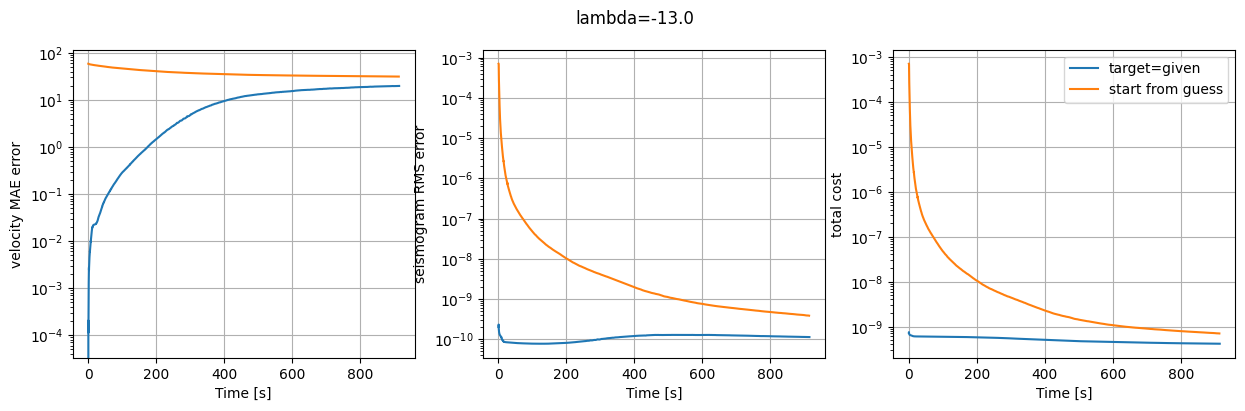

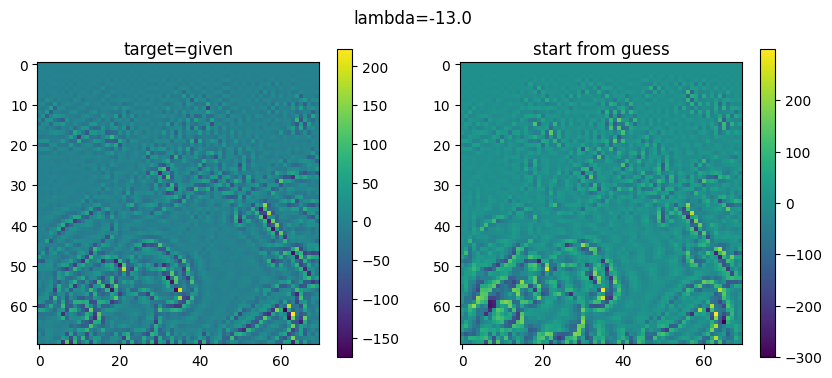

-12.0
diag 1.4260362382528039e-05
diag 1.4260362382528039e-05


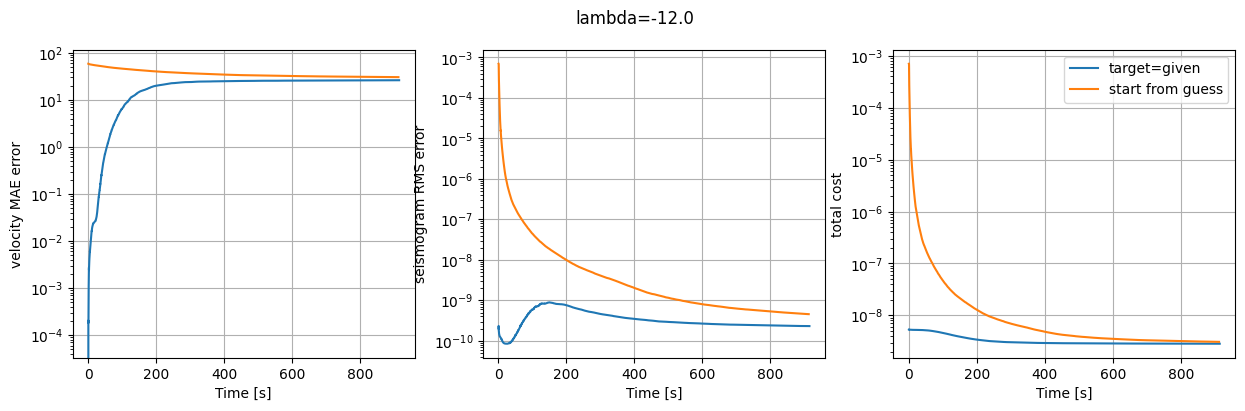

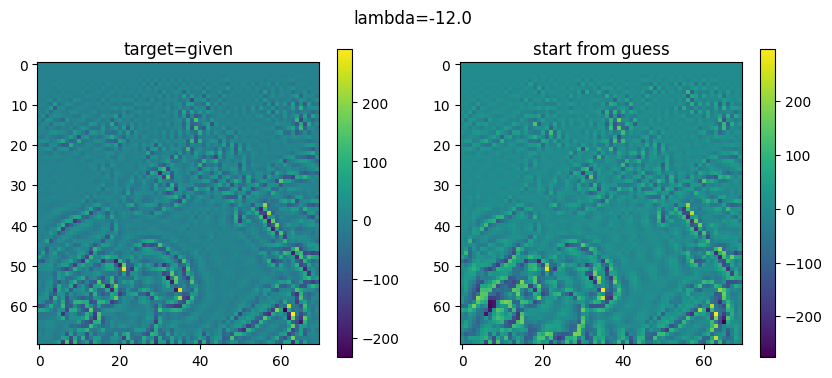

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.49it/s]


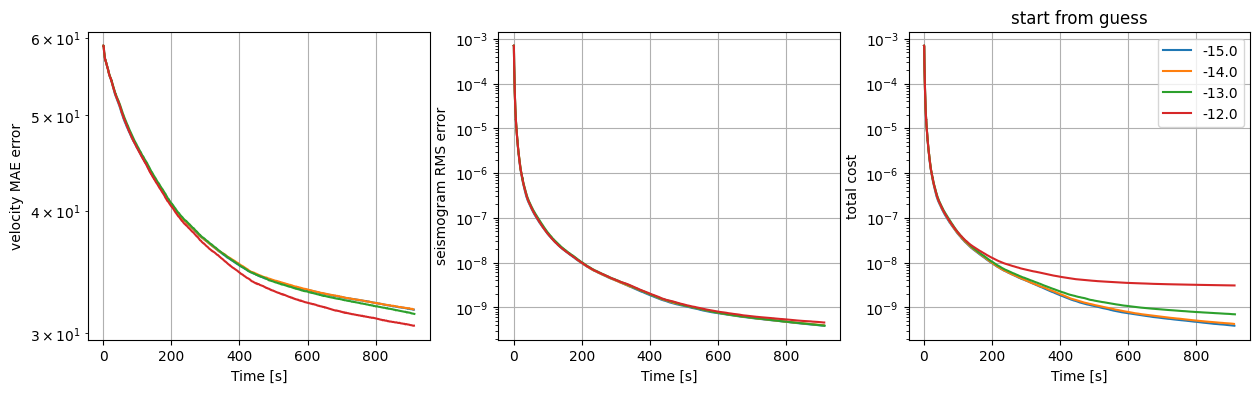

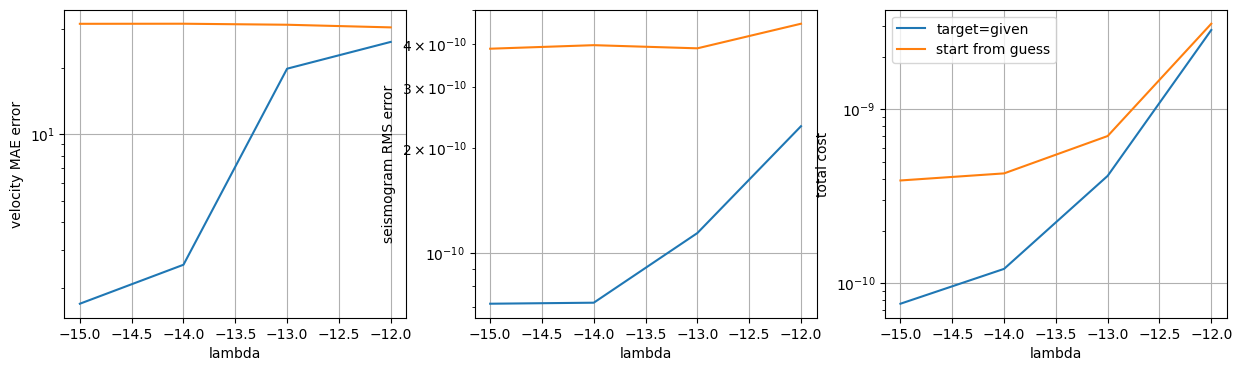

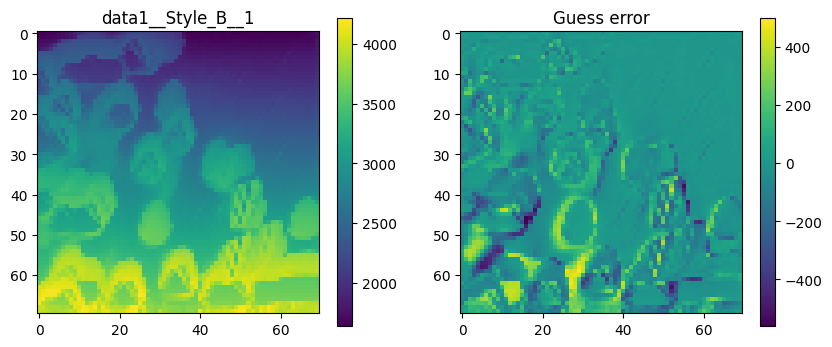

-15.0
diag 1.6439729937896137e-05
diag 1.6439729937896137e-05


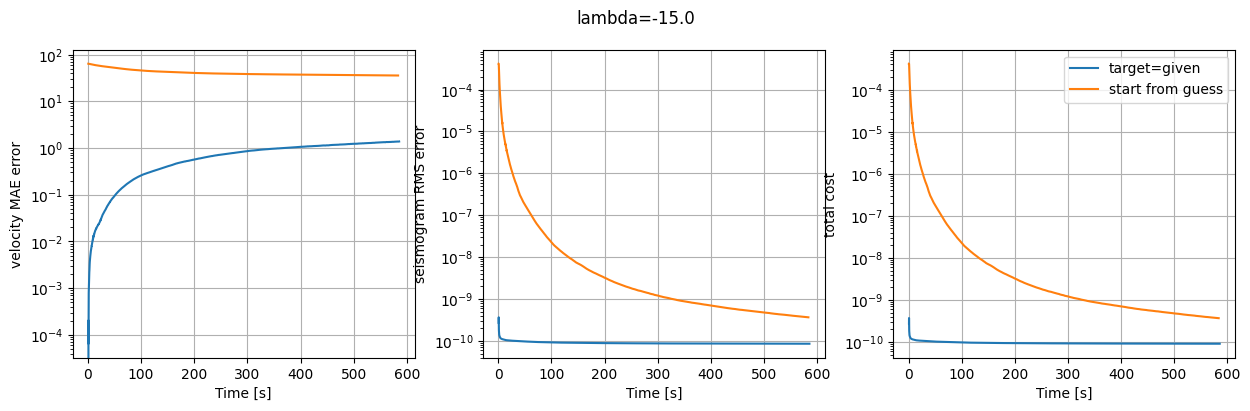

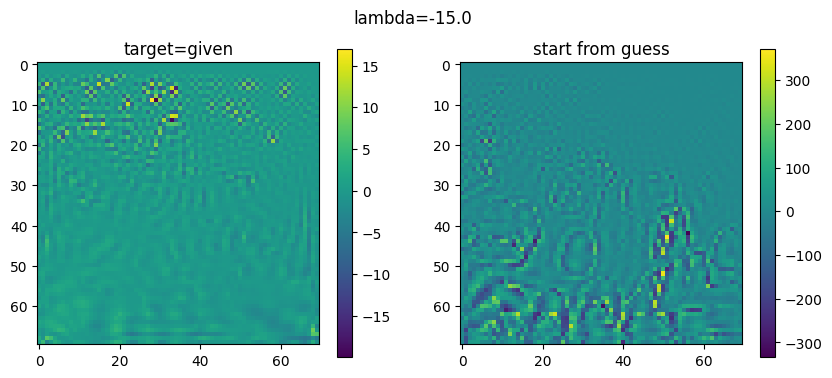

-14.0
diag 1.6439729937896137e-05
diag 1.6439729937896137e-05


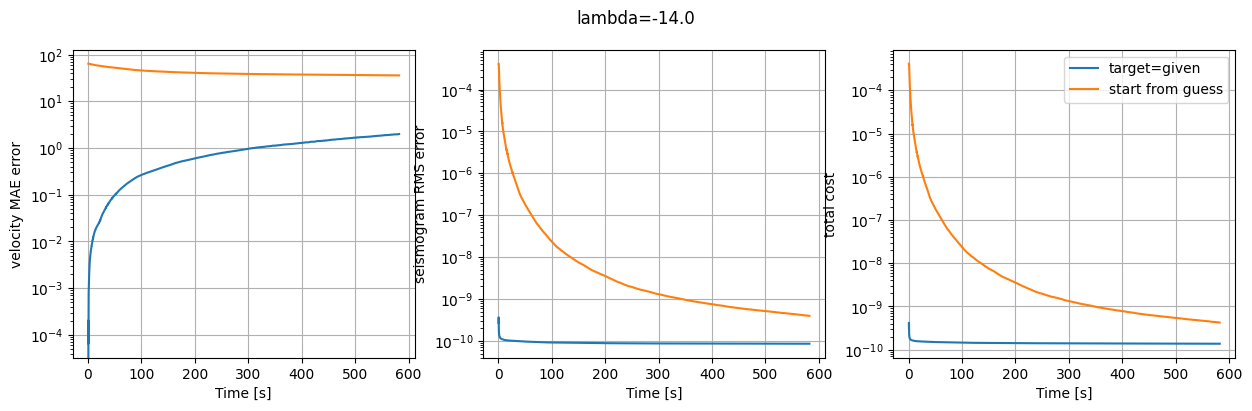

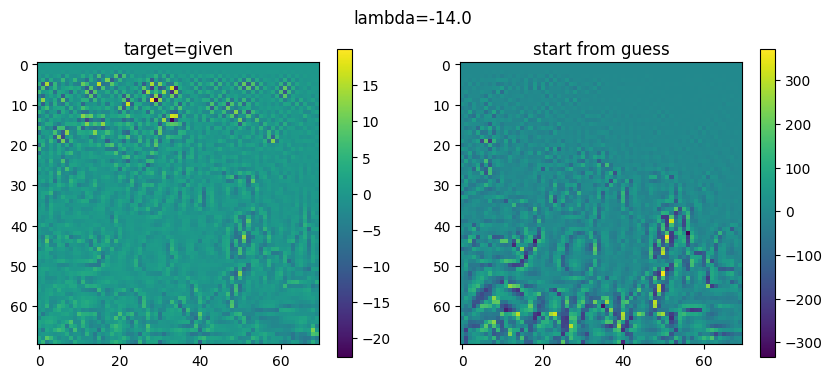

-13.0
diag 1.6439729937896137e-05
diag 1.6439729937896137e-05


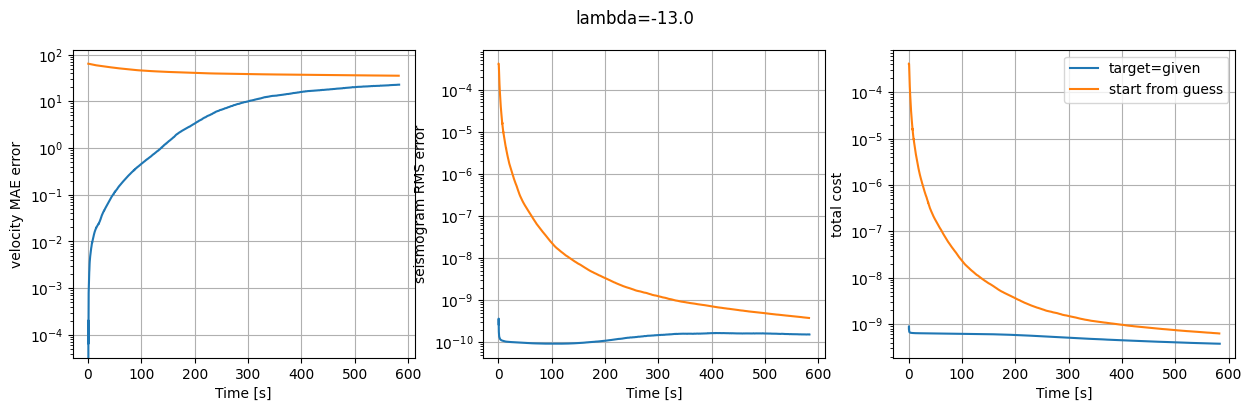

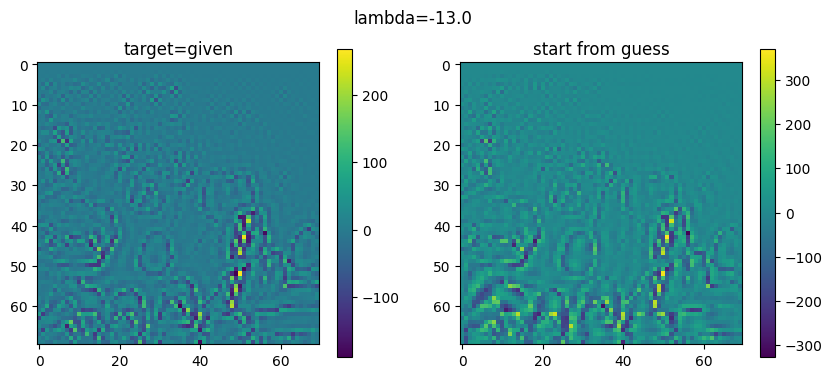

-12.0
diag 1.6439729937896137e-05
diag 1.6439729937896137e-05


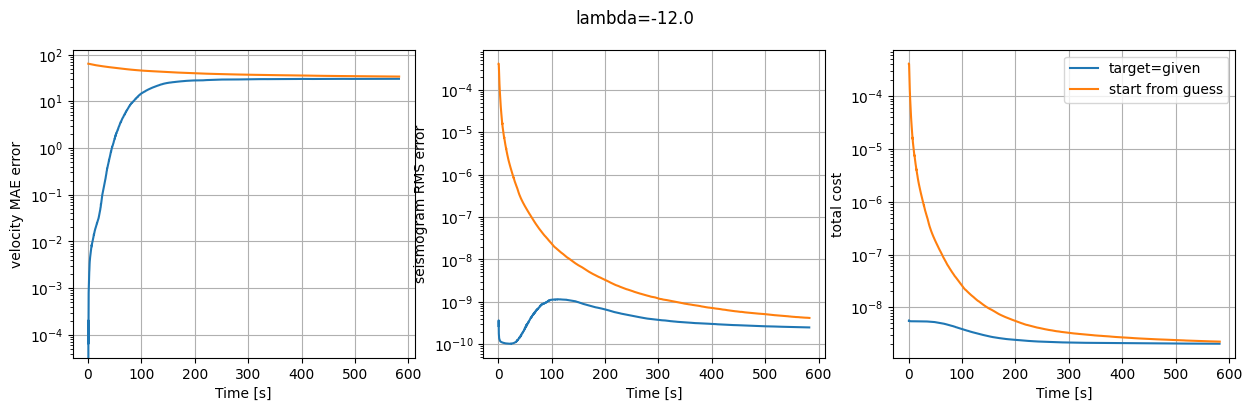

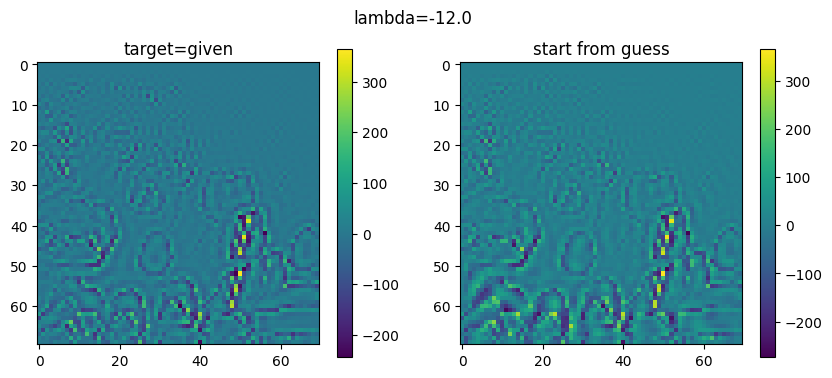

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.76it/s]


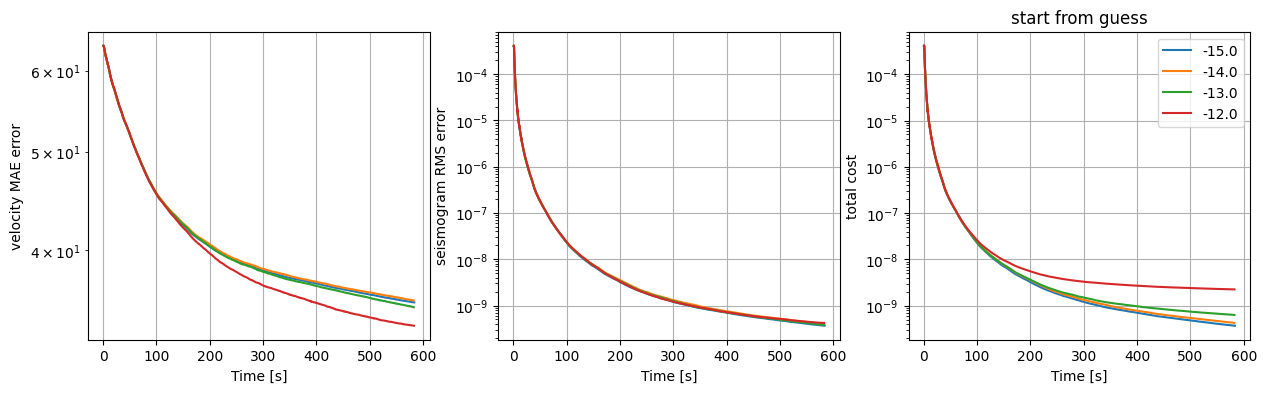

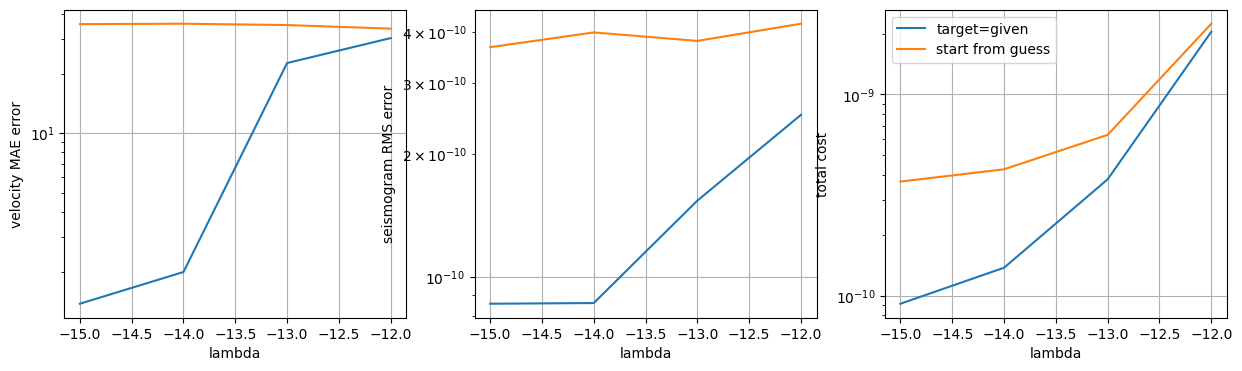

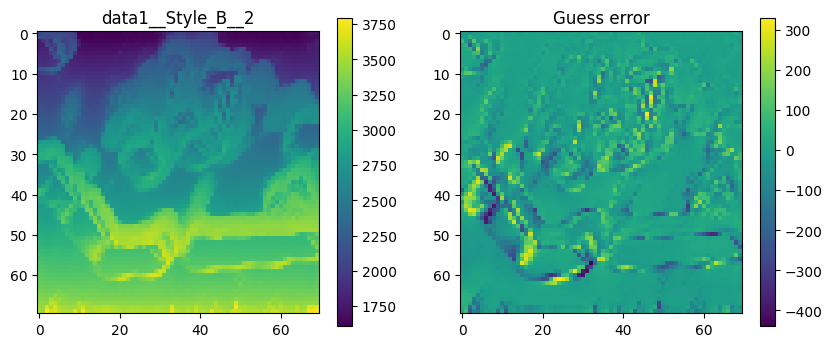

-15.0
diag 3.0893801798293284e-05
diag 3.0893801798293284e-05


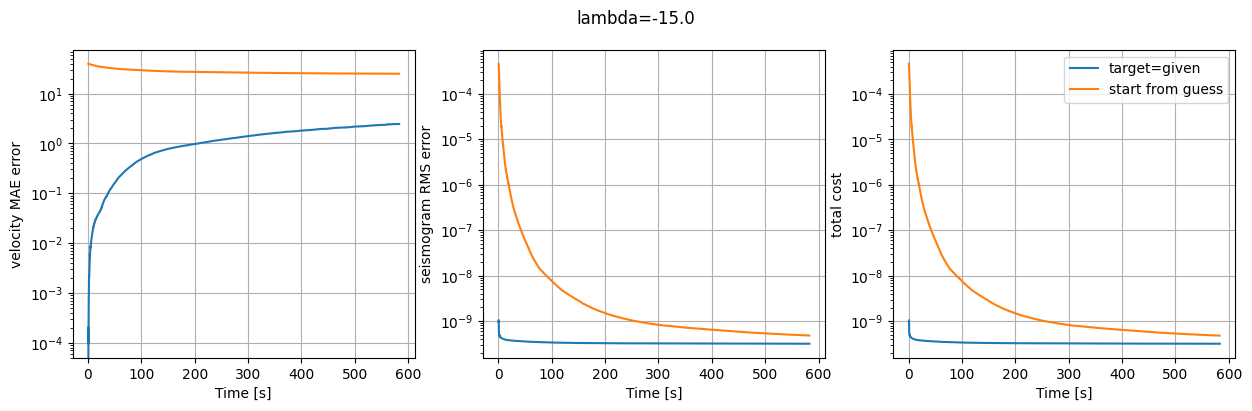

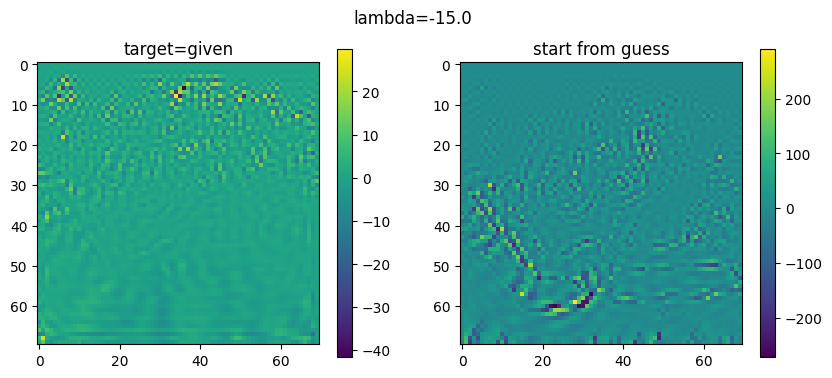

-14.0
diag 3.0893801798293284e-05
diag 3.0893801798293284e-05


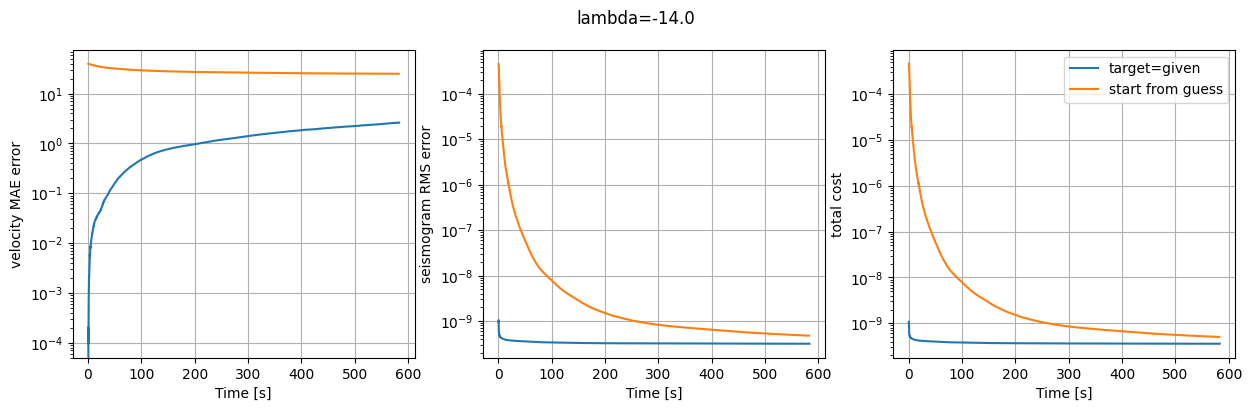

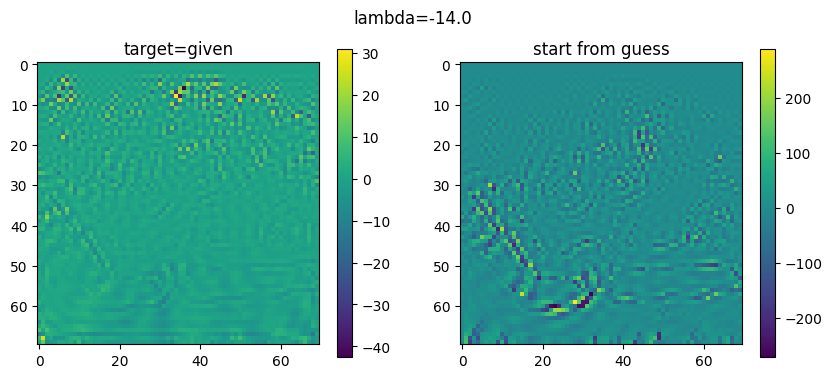

-13.0
diag 3.0893801798293284e-05
diag 3.0893801798293284e-05


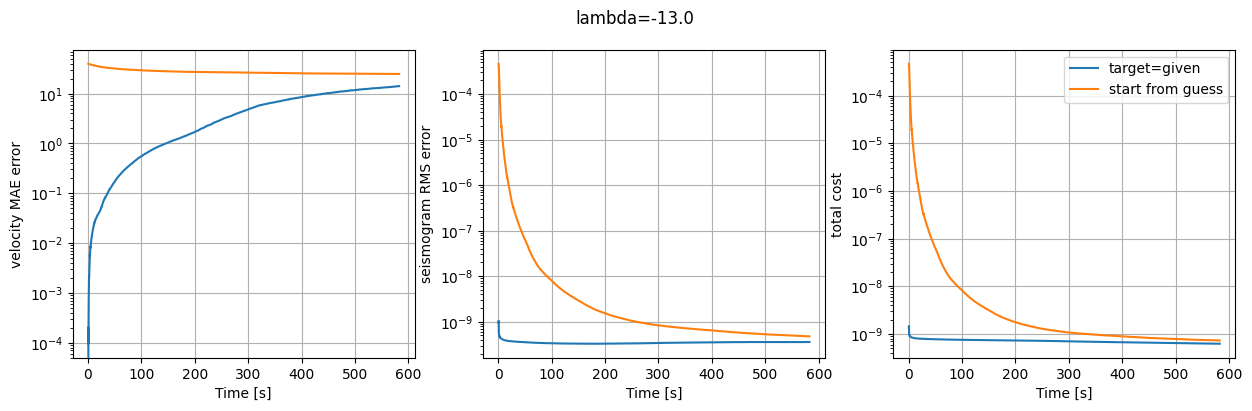

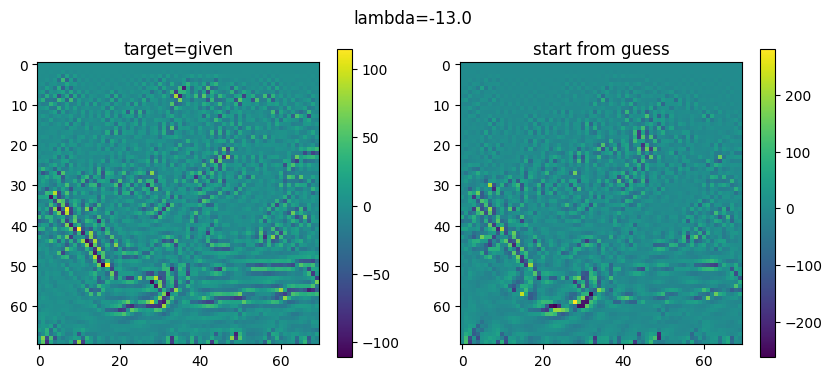

-12.0
diag 3.0893801798293284e-05
diag 3.0893801798293284e-05


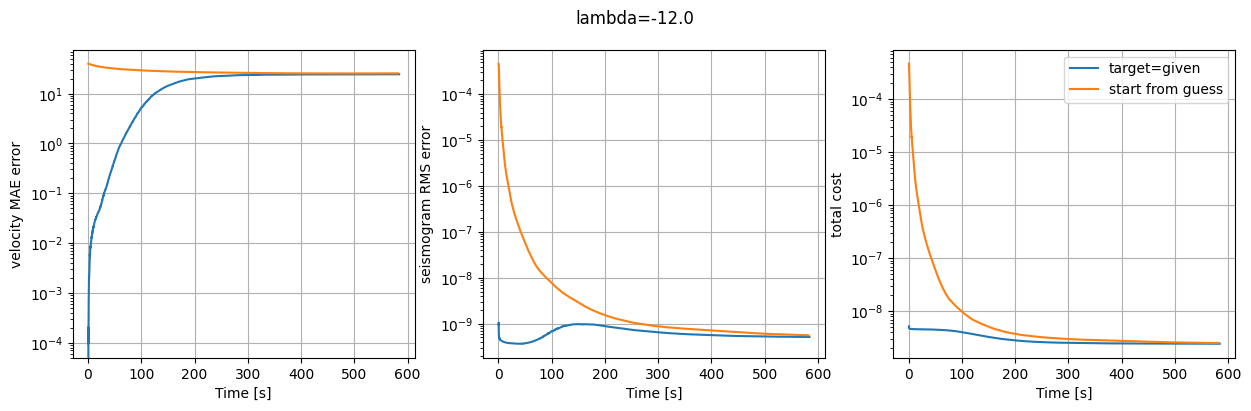

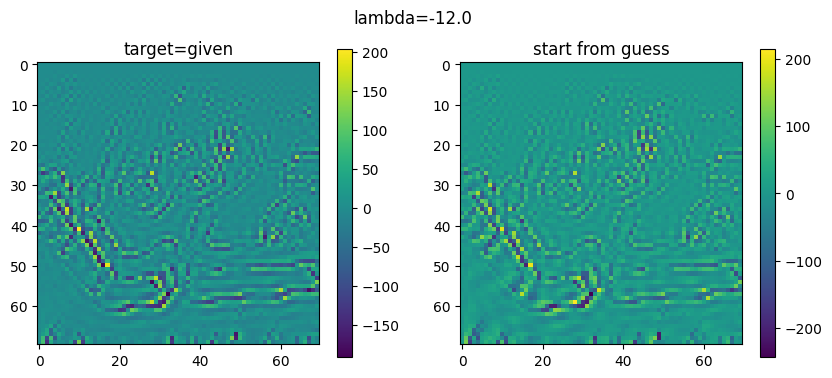

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.74it/s]


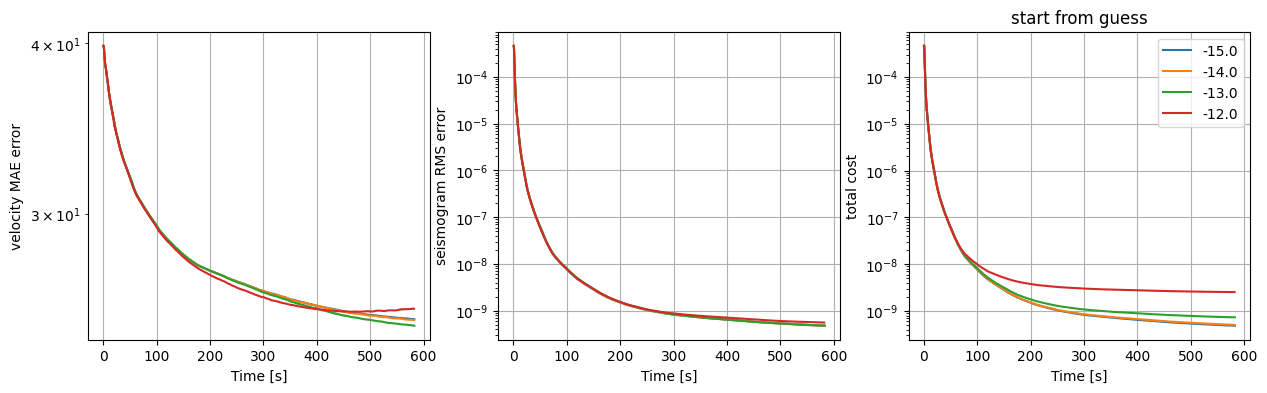

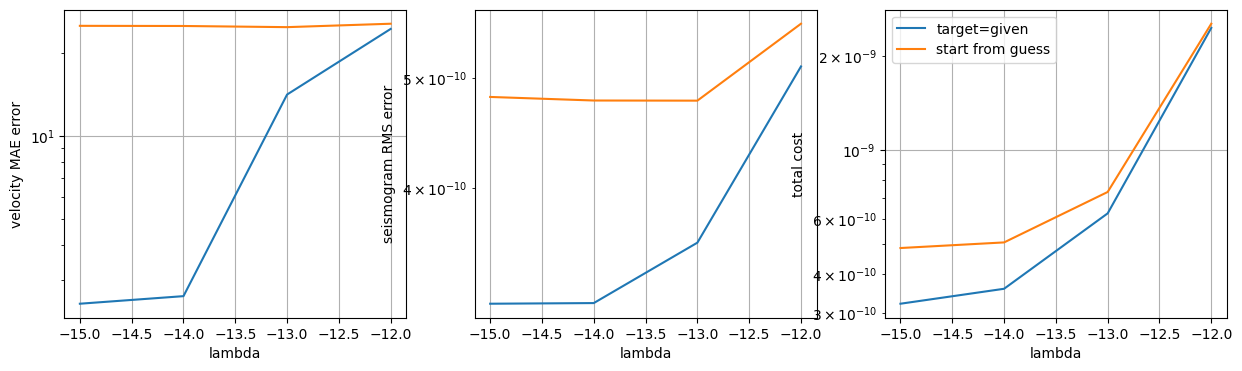

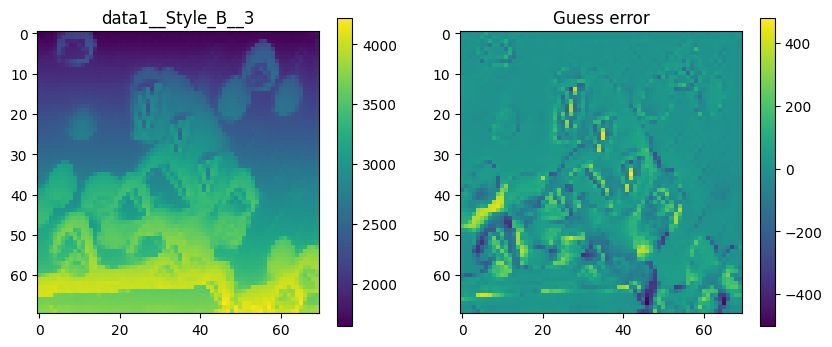

-15.0
diag 1.365213059380767e-05
diag 1.365213059380767e-05


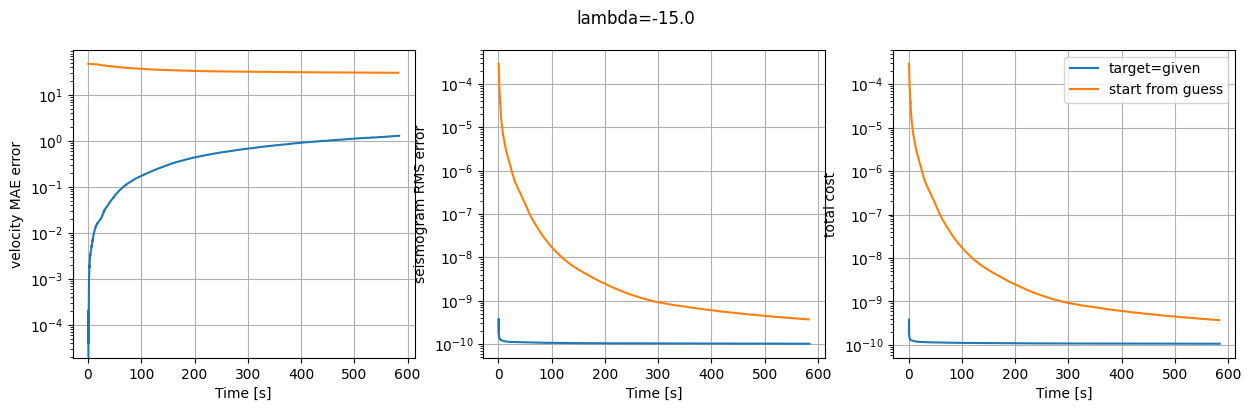

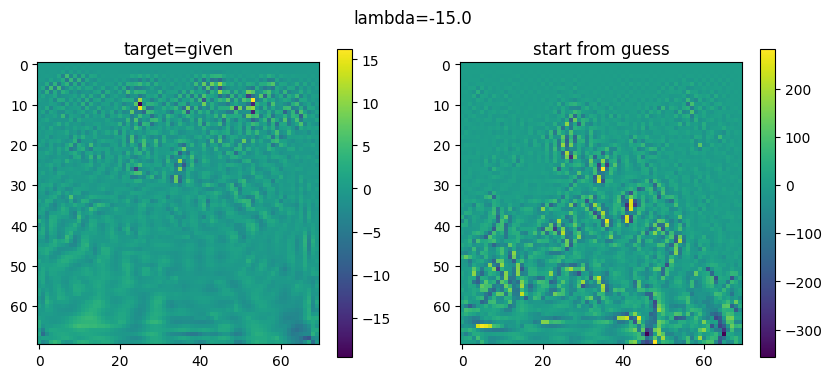

-14.0
diag 1.365213059380767e-05
diag 1.365213059380767e-05


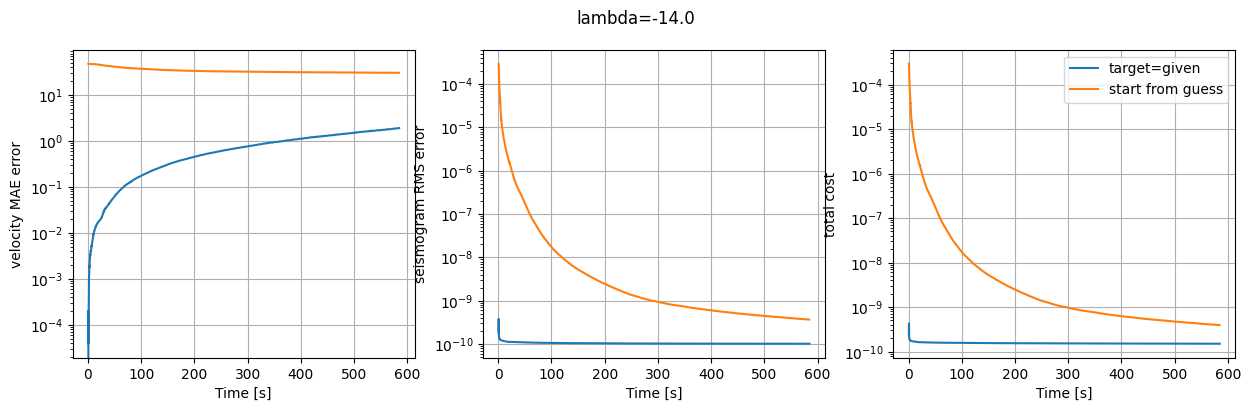

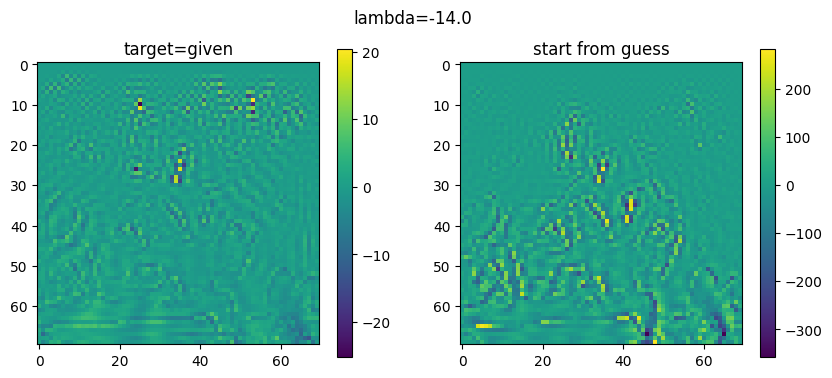

-13.0
diag 1.365213059380767e-05
diag 1.365213059380767e-05


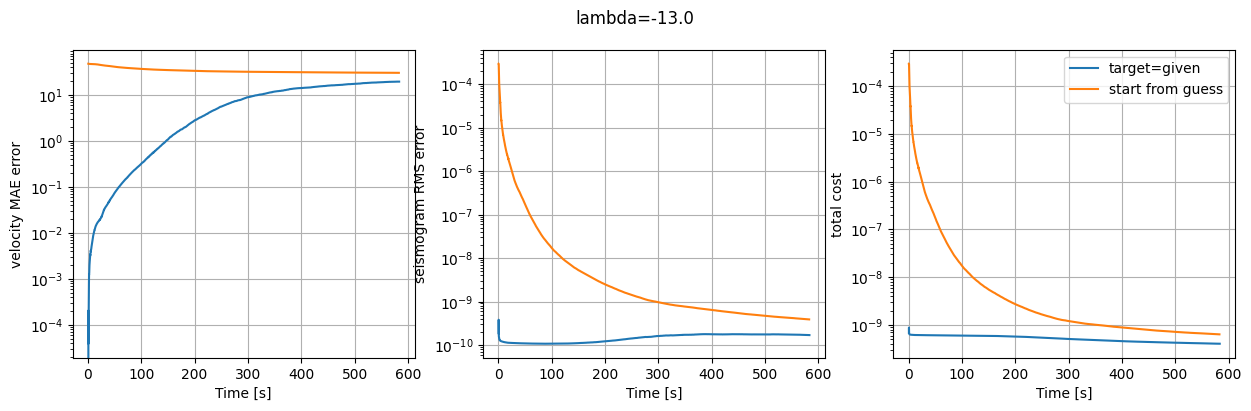

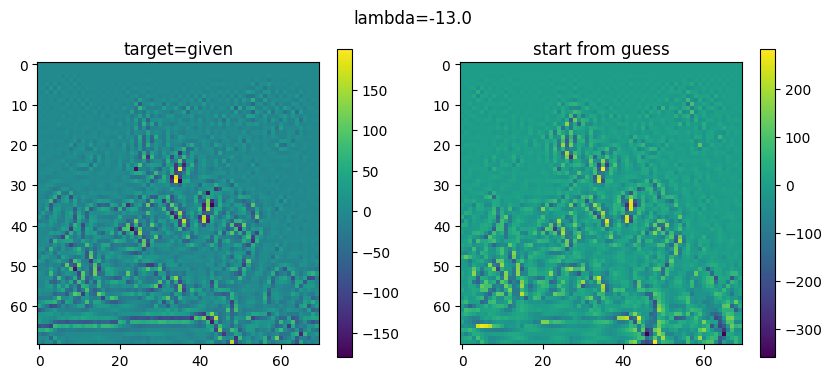

-12.0
diag 1.365213059380767e-05
diag 1.365213059380767e-05


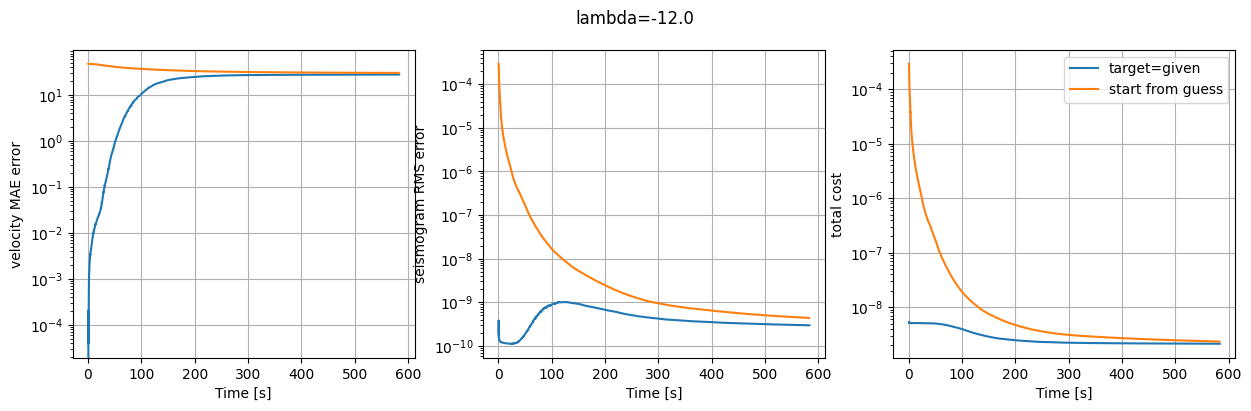

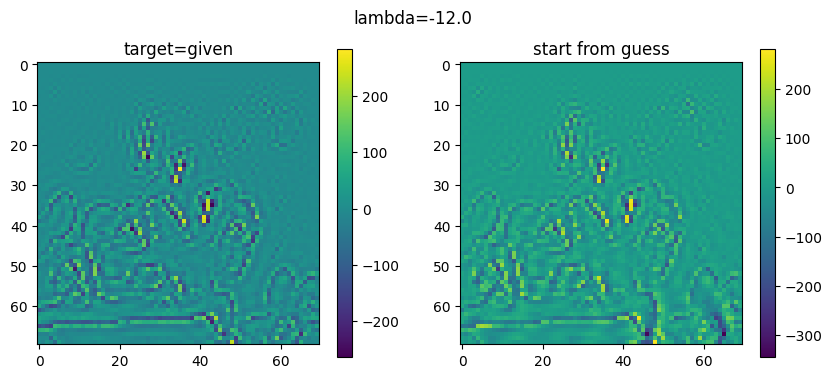

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.23it/s]


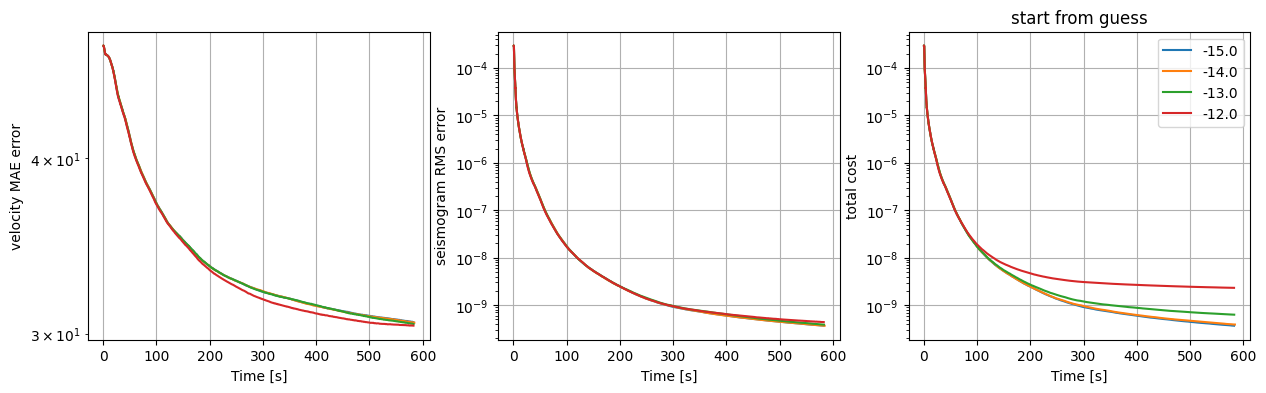

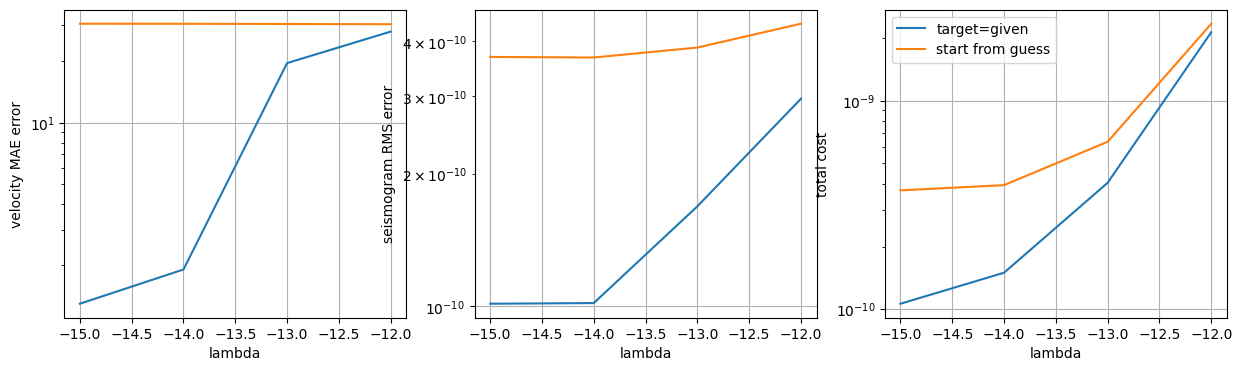

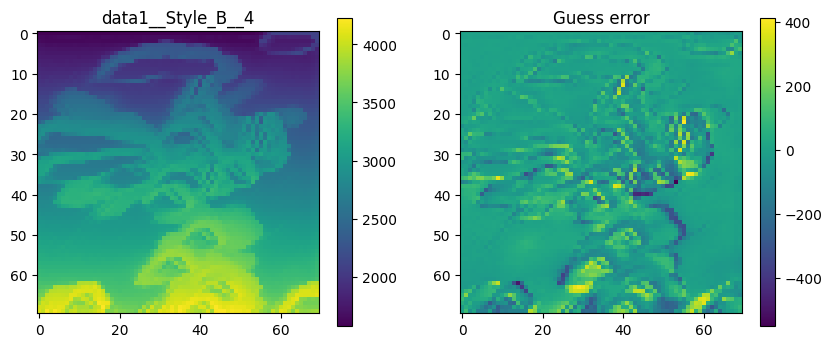

-15.0
diag 1.358859475490049e-05
diag 1.358859475490049e-05


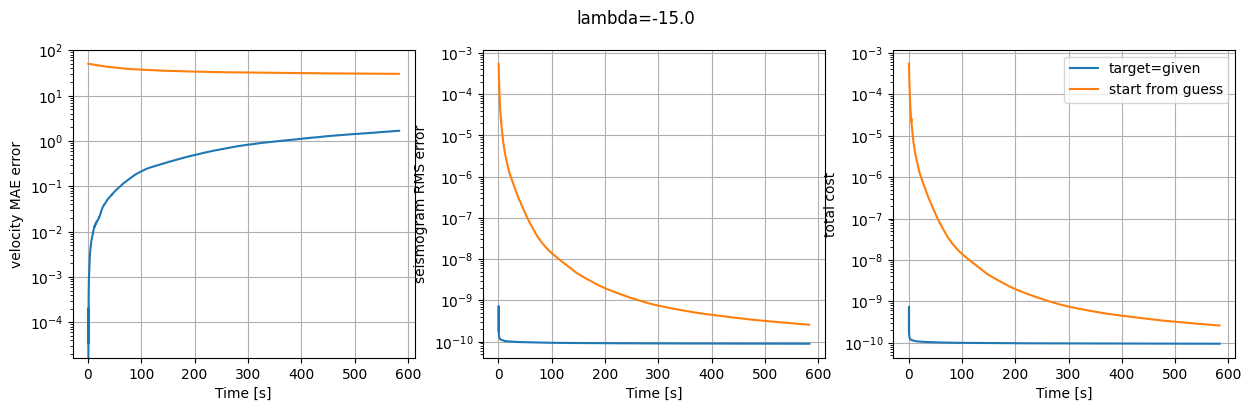

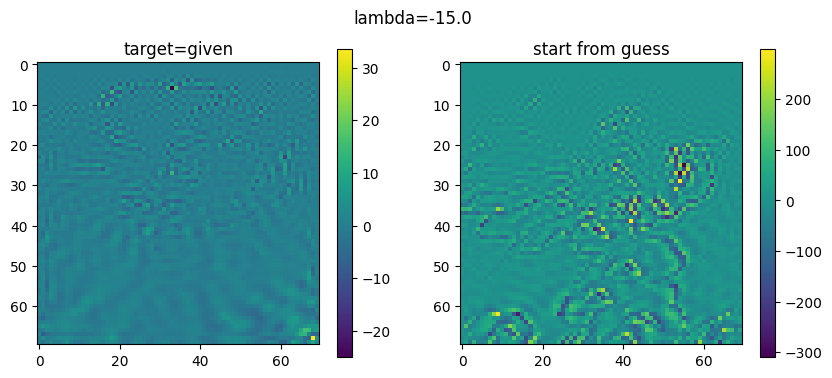

-14.0
diag 1.358859475490049e-05
diag 1.358859475490049e-05


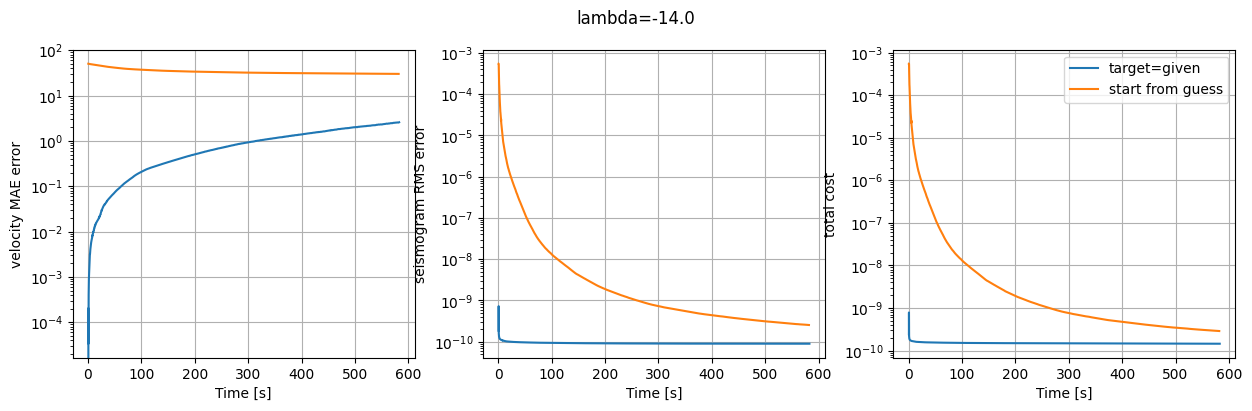

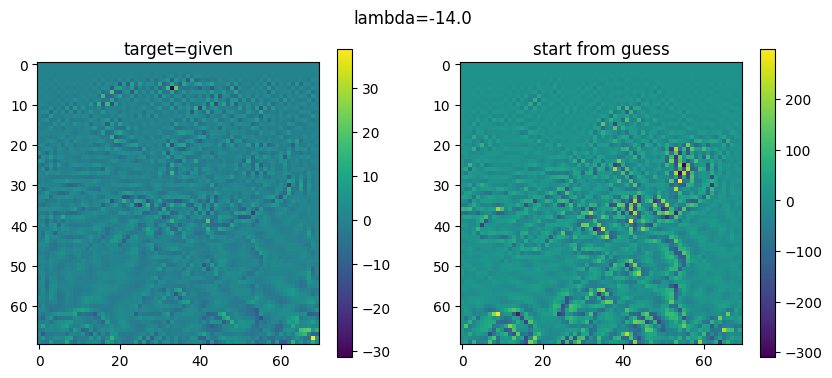

-13.0
diag 1.358859475490049e-05
diag 1.358859475490049e-05


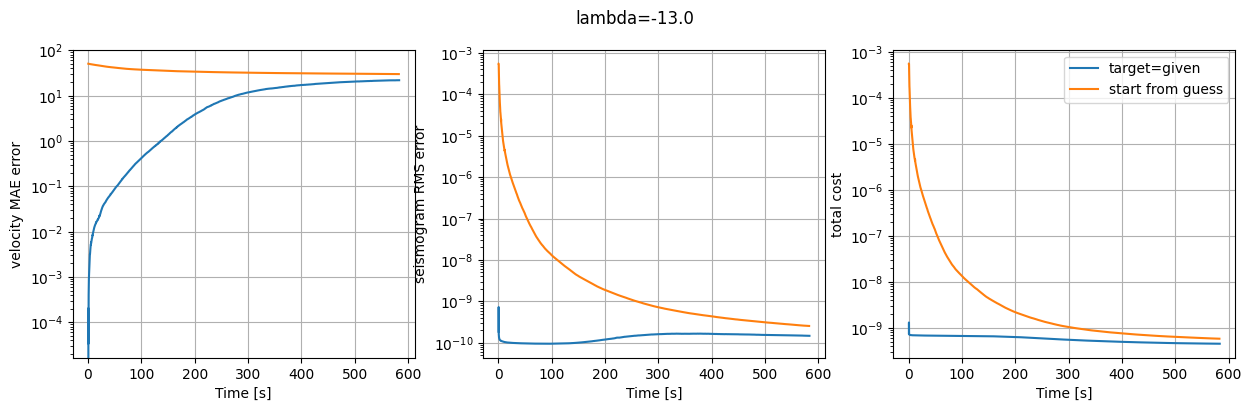

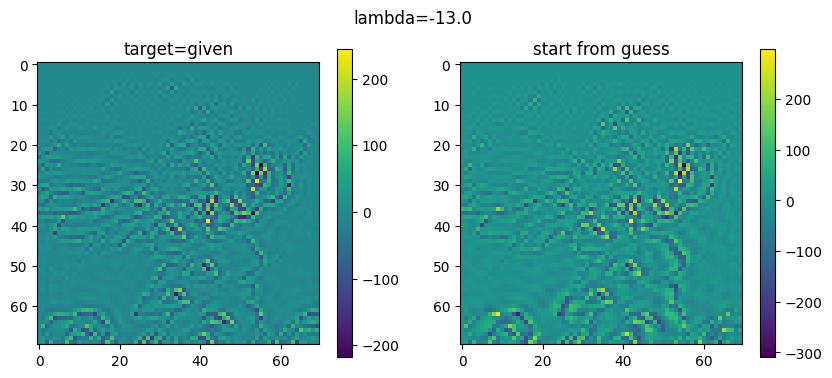

-12.0
diag 1.358859475490049e-05
diag 1.358859475490049e-05


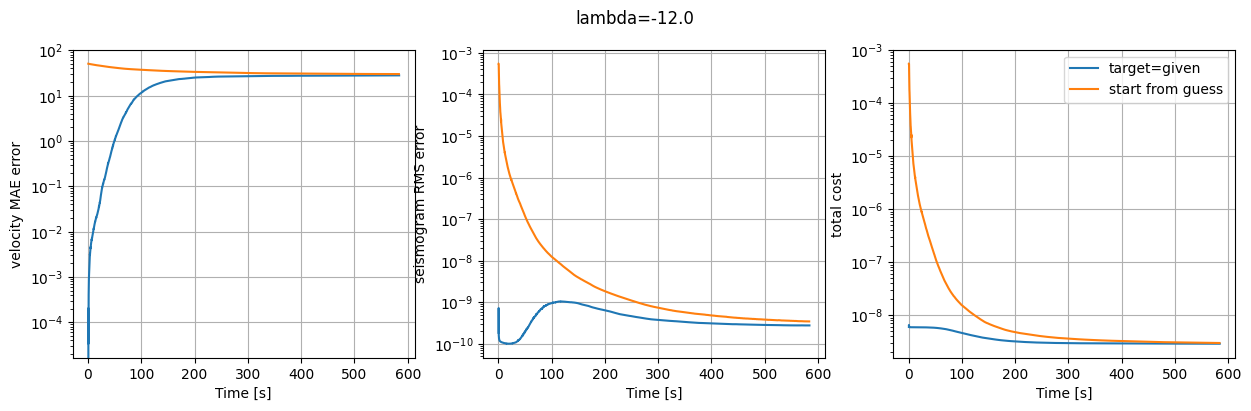

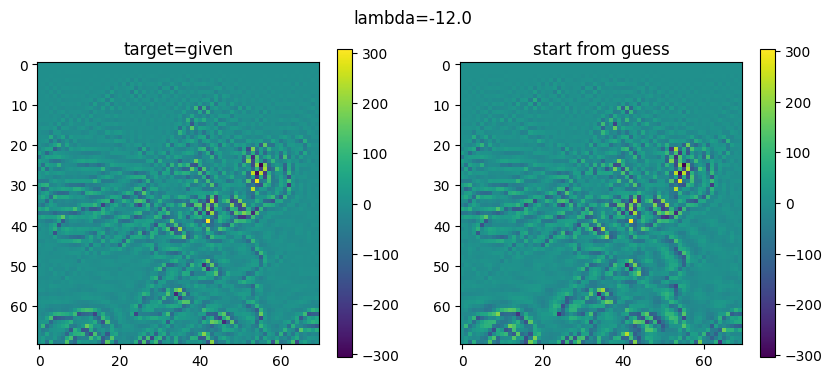

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.05it/s]


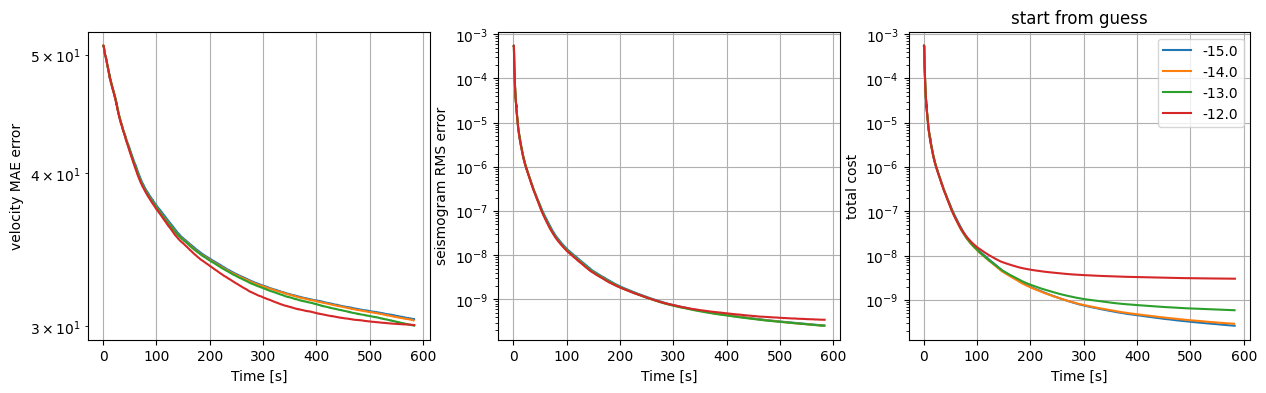

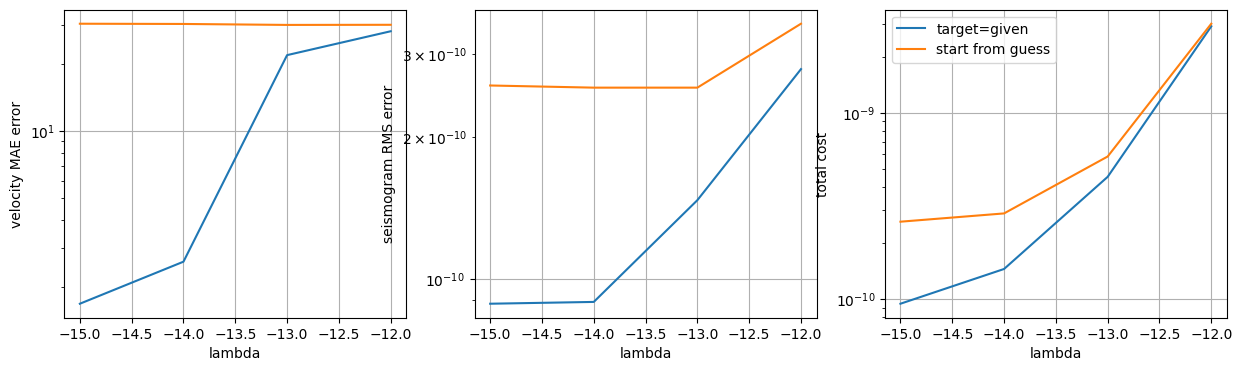

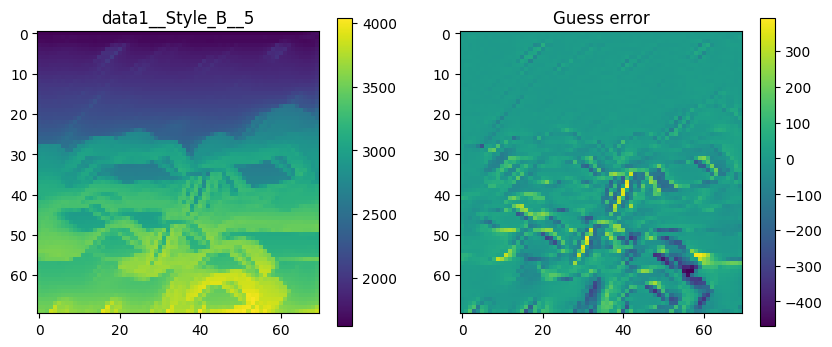

-15.0
diag 1.823310847886537e-05
diag 1.823310847886537e-05


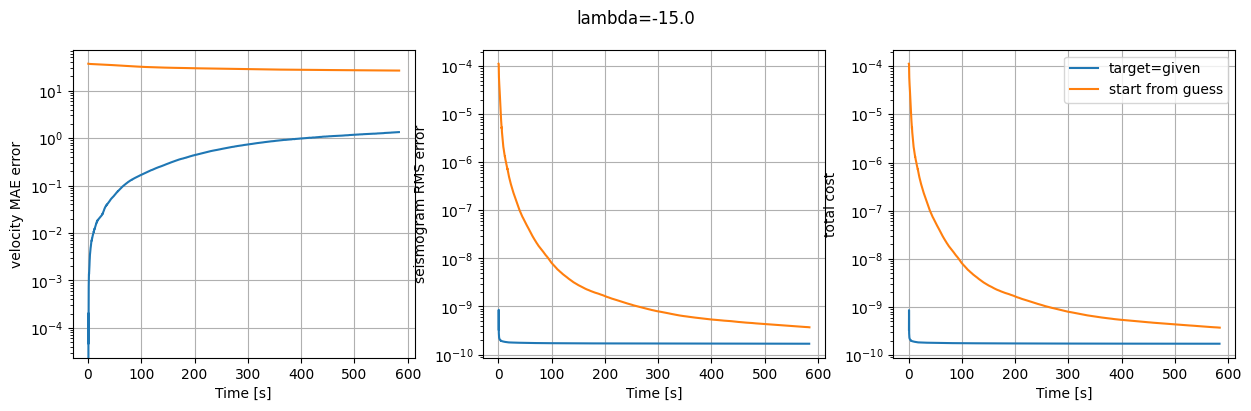

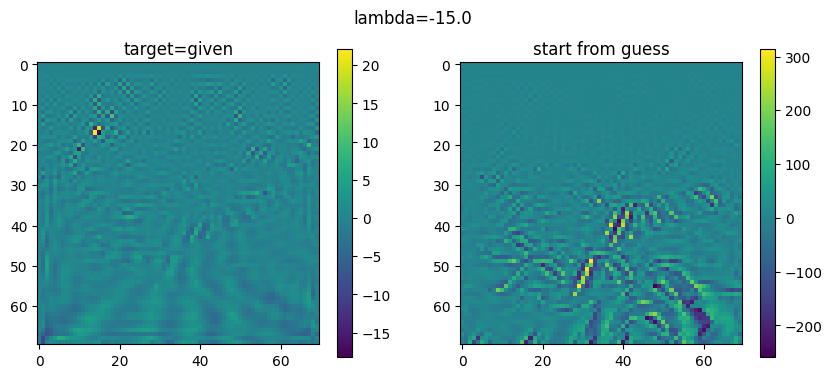

-14.0
diag 1.823310847886537e-05
diag 1.823310847886537e-05


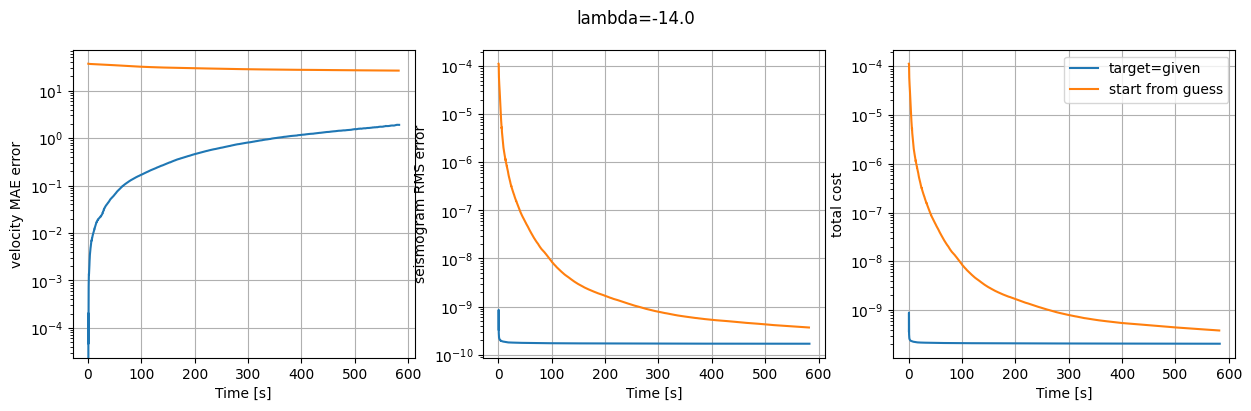

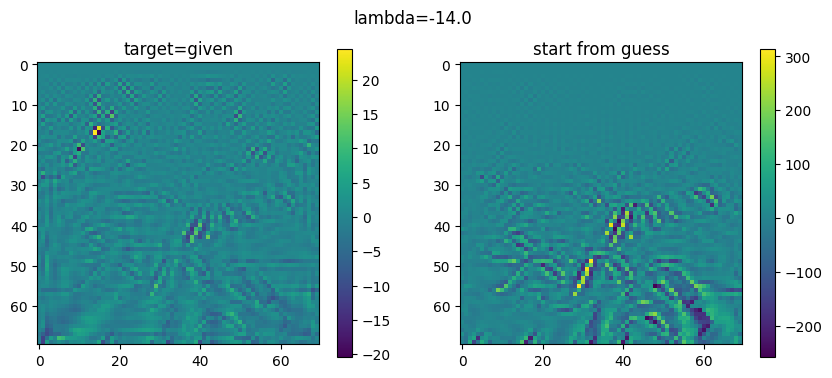

-13.0
diag 1.823310847886537e-05
diag 1.823310847886537e-05


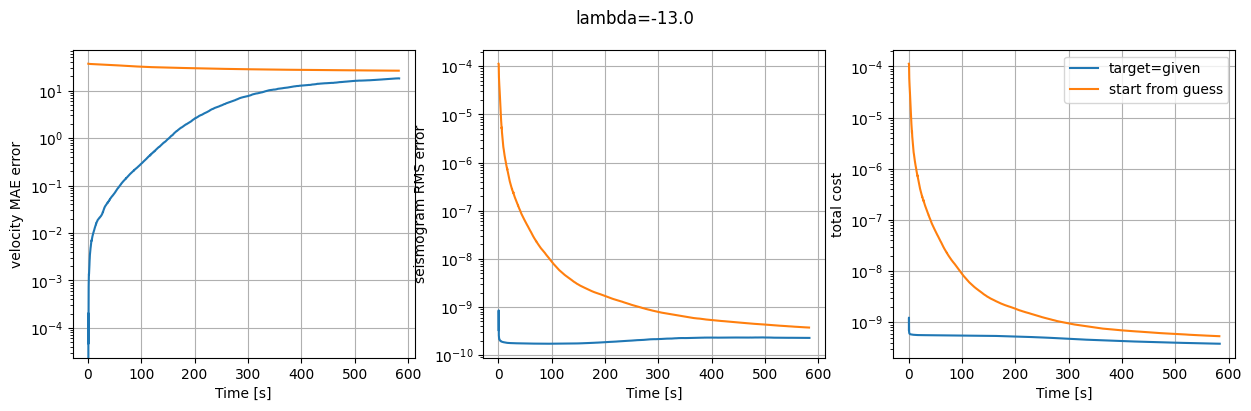

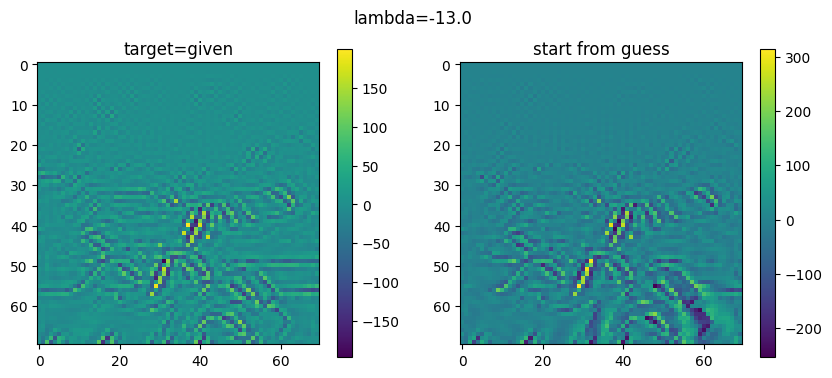

-12.0
diag 1.823310847886537e-05
diag 1.823310847886537e-05


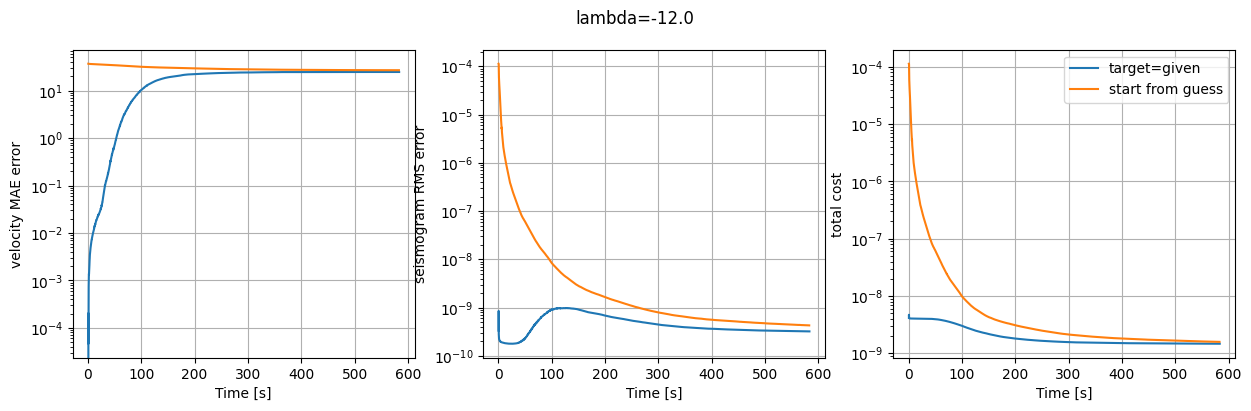

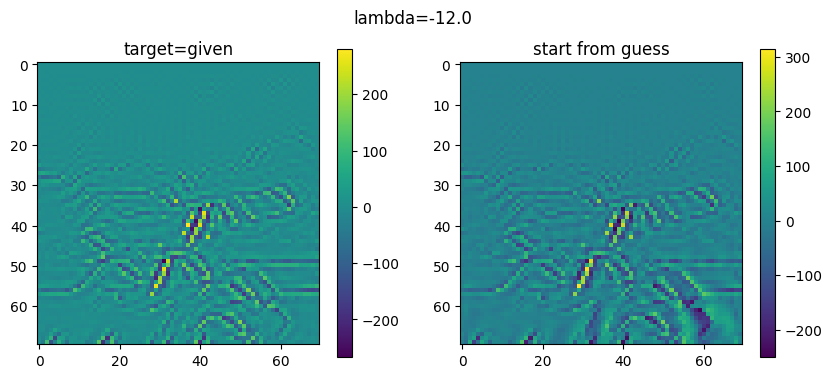

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.05it/s]


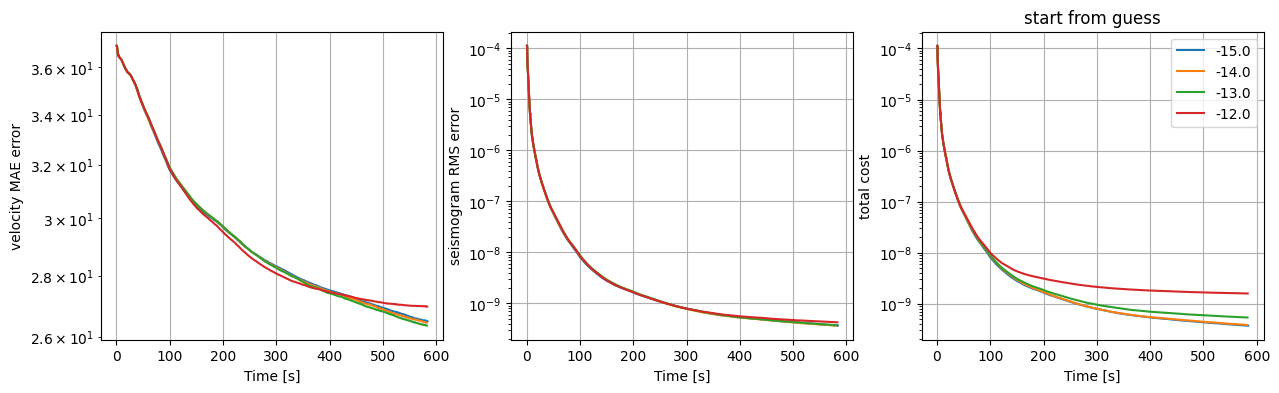

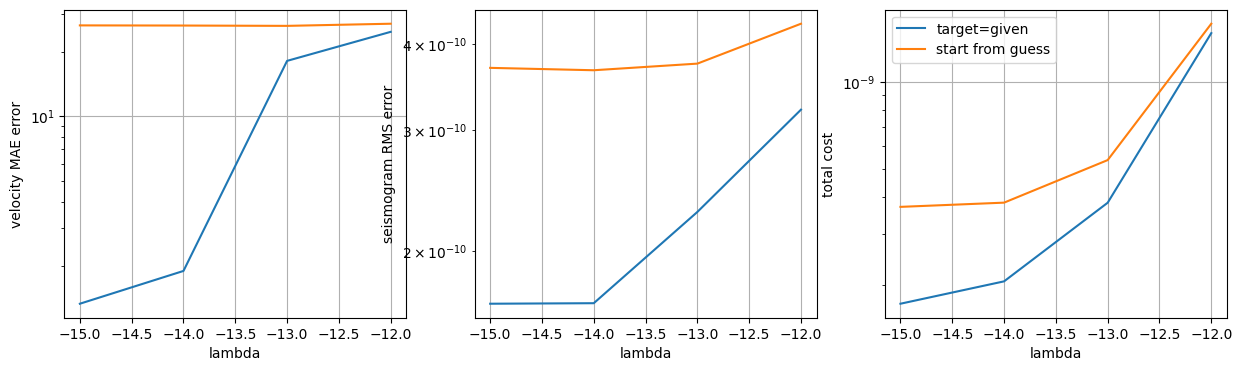

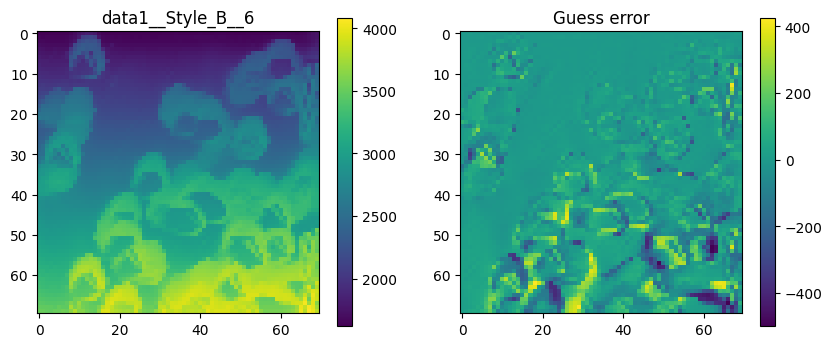

-15.0
diag 1.8282642235475886e-05
diag 1.8282642235475886e-05


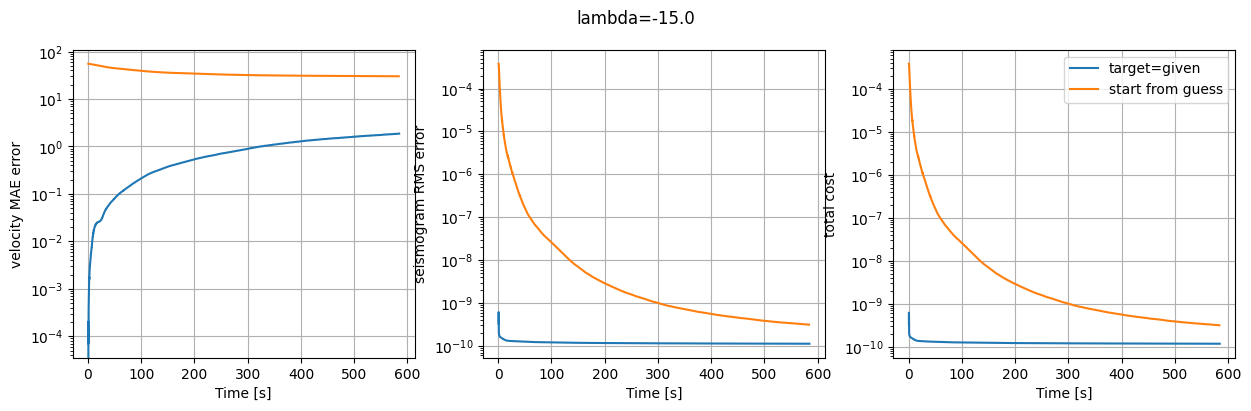

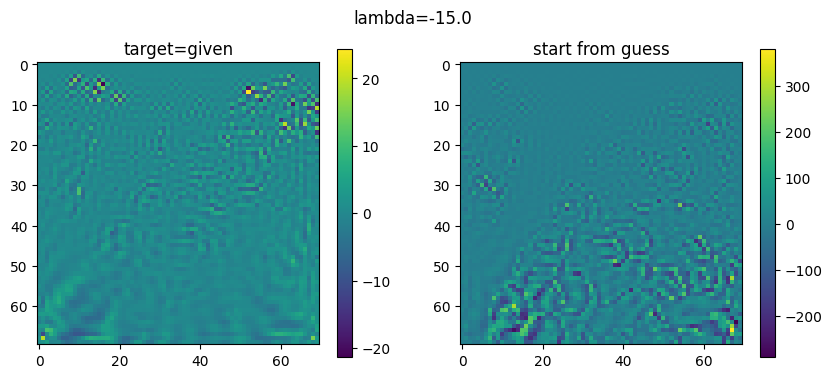

-14.0
diag 1.8282642235475886e-05
diag 1.8282642235475886e-05


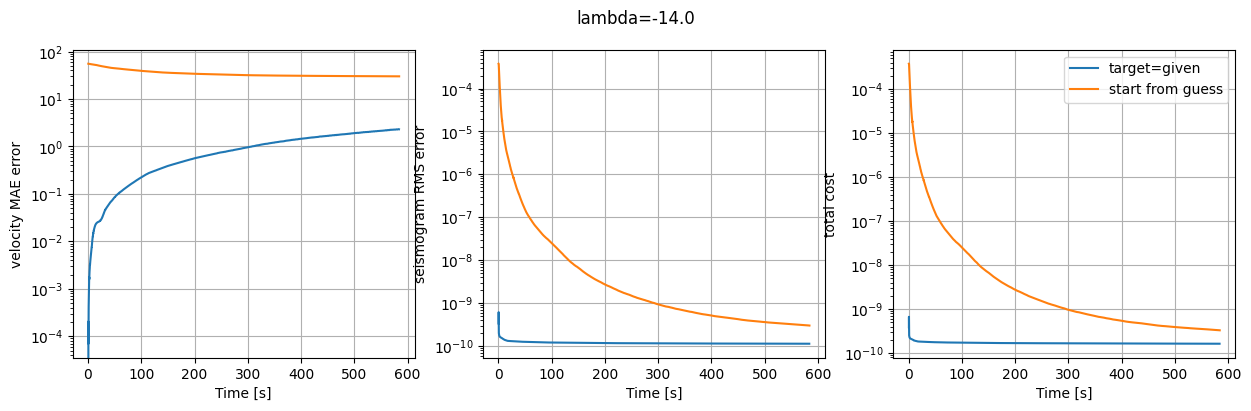

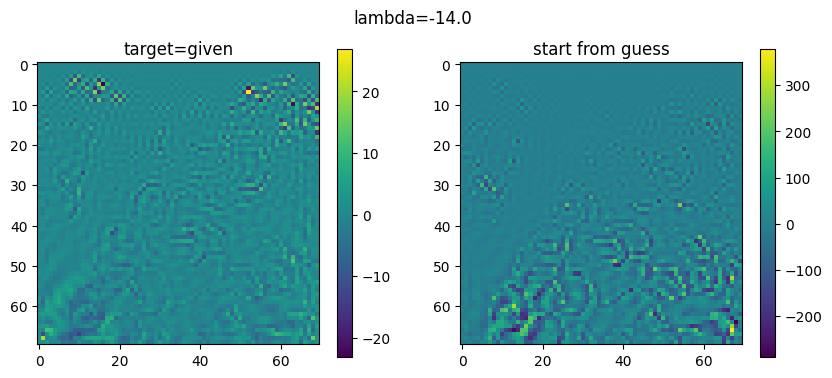

-13.0
diag 1.8282642235475886e-05
diag 1.8282642235475886e-05


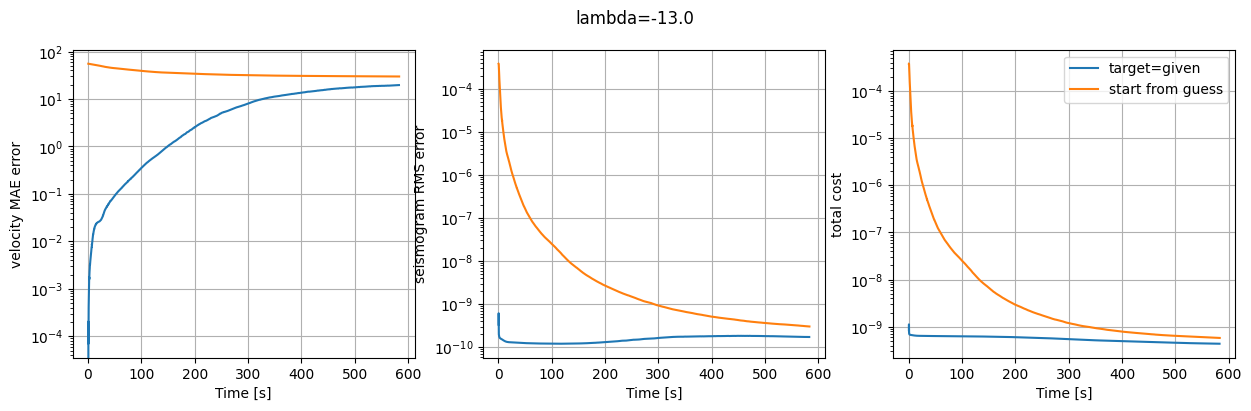

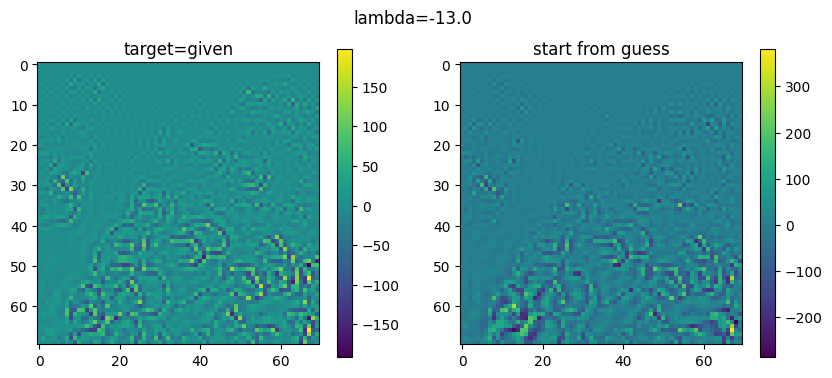

-12.0
diag 1.8282642235475886e-05
diag 1.8282642235475886e-05


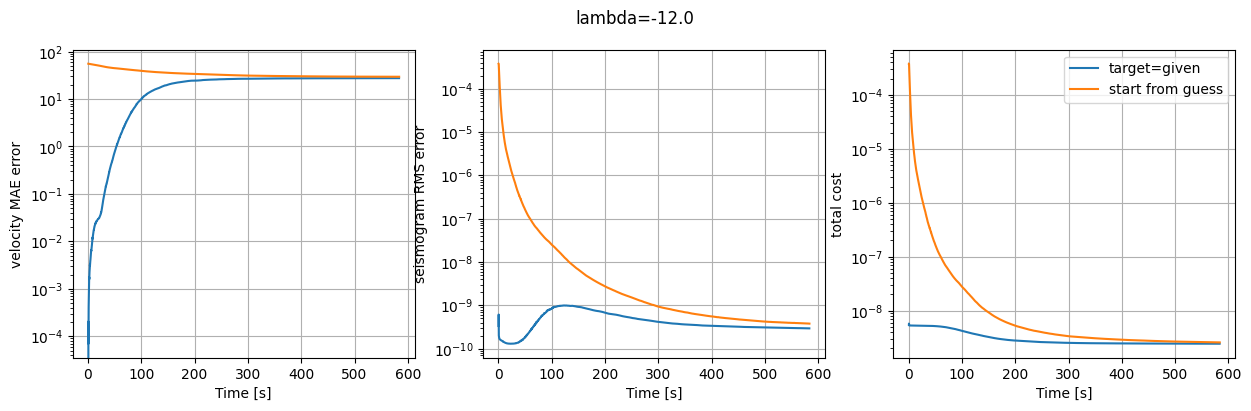

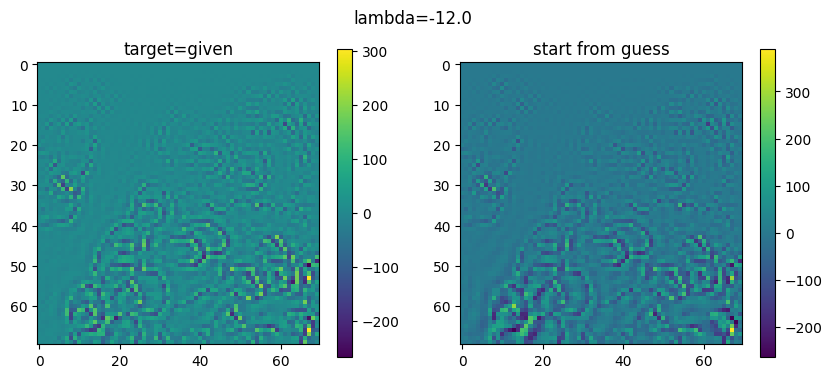

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.98it/s]


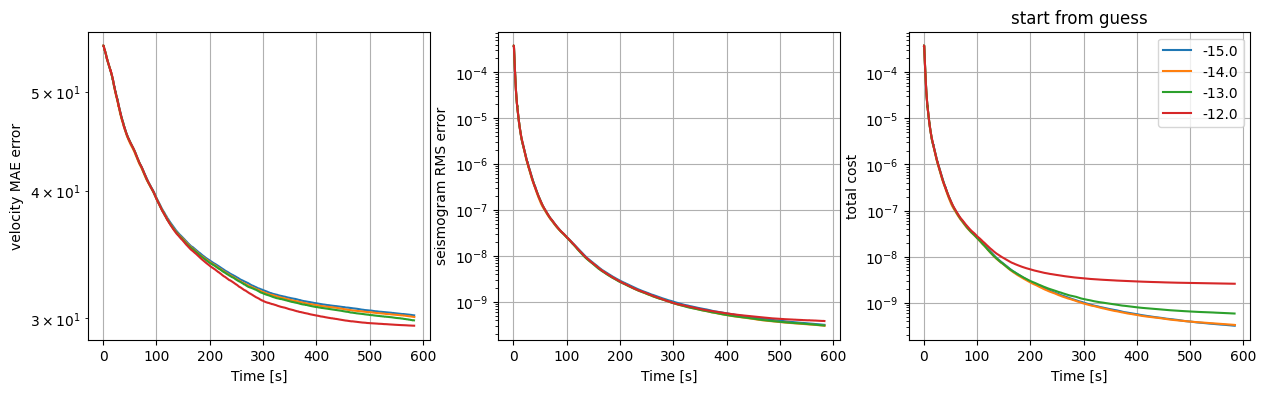

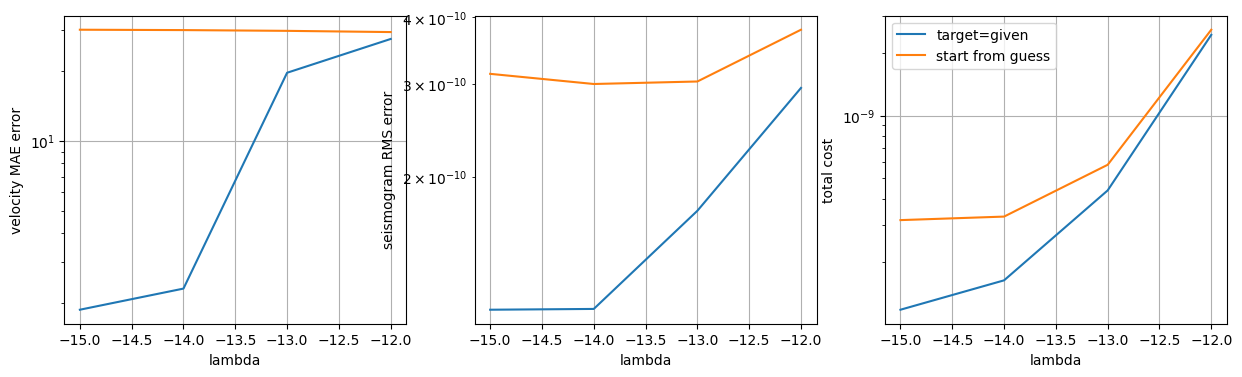

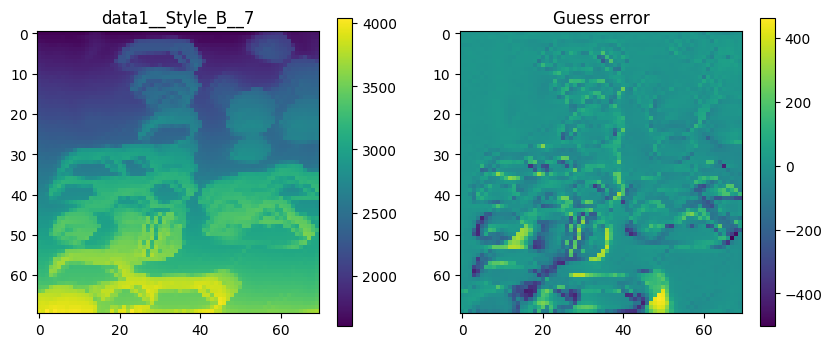

-15.0
diag 2.230749871820207e-05
diag 2.230749871820207e-05


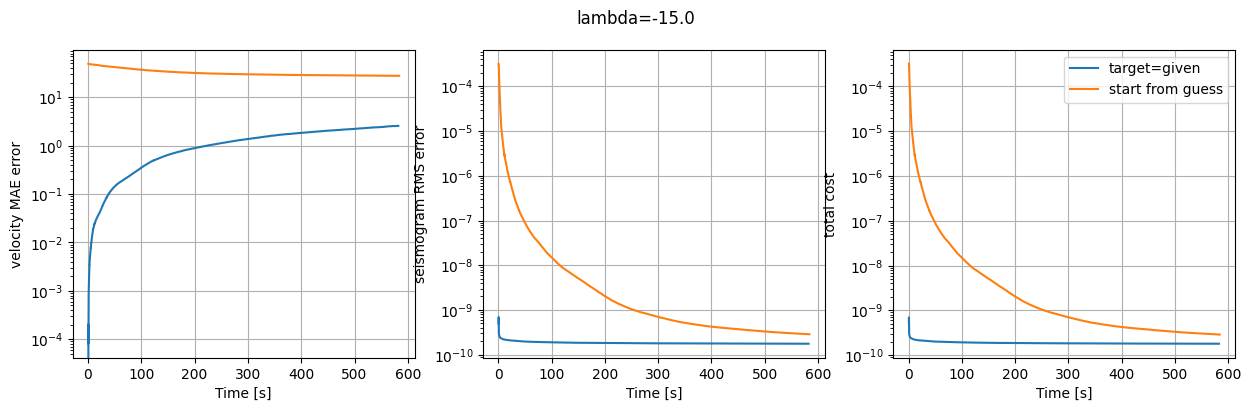

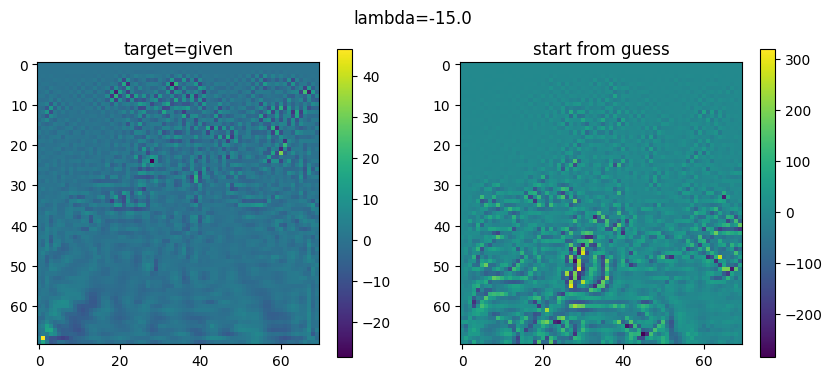

-14.0
diag 2.230749871820207e-05
diag 2.230749871820207e-05


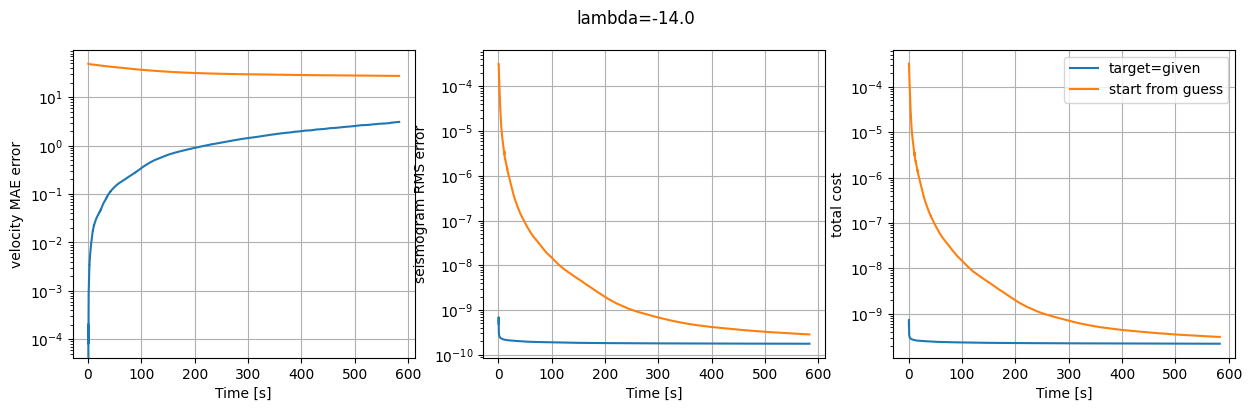

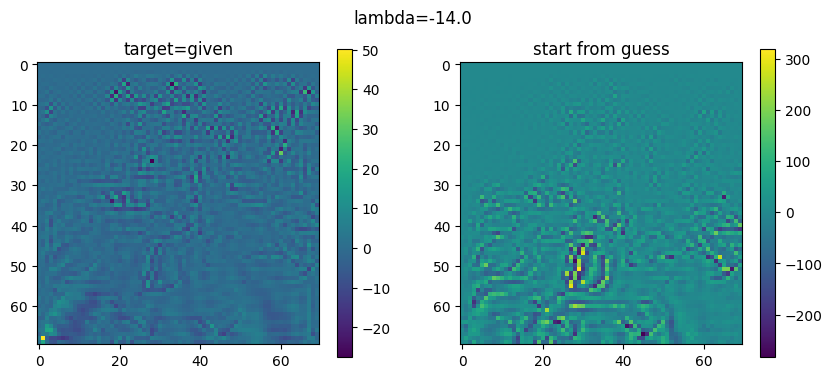

-13.0
diag 2.230749871820207e-05
diag 2.230749871820207e-05


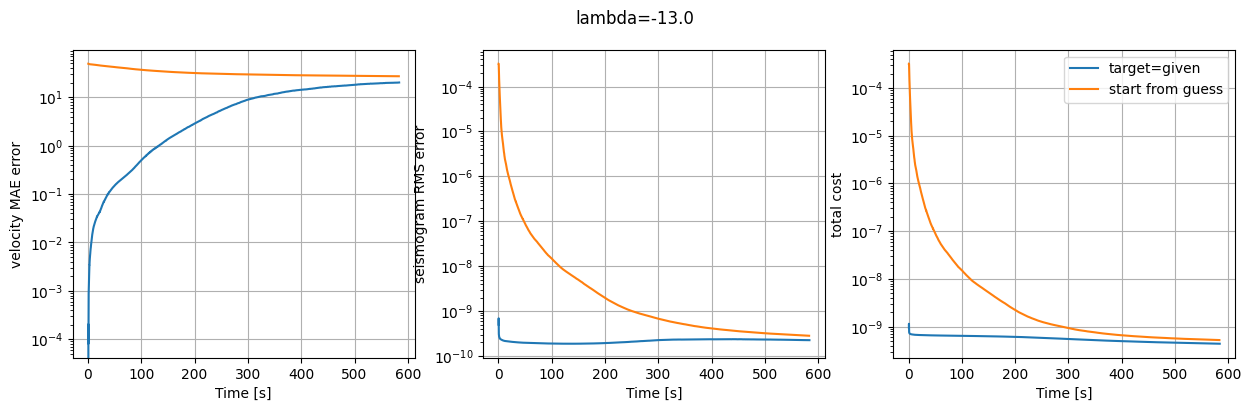

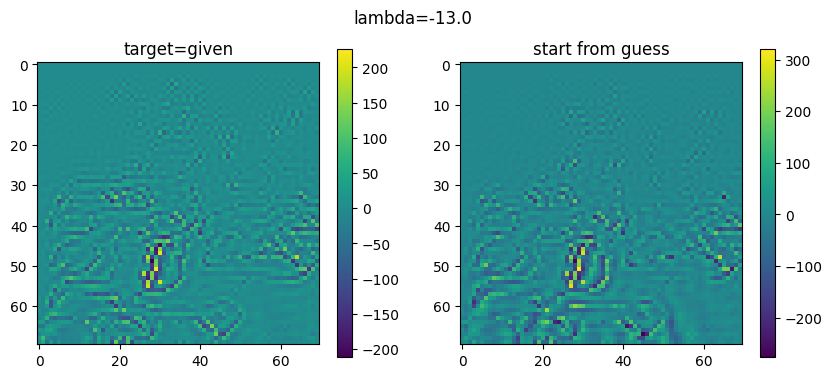

-12.0
diag 2.230749871820207e-05
diag 2.230749871820207e-05


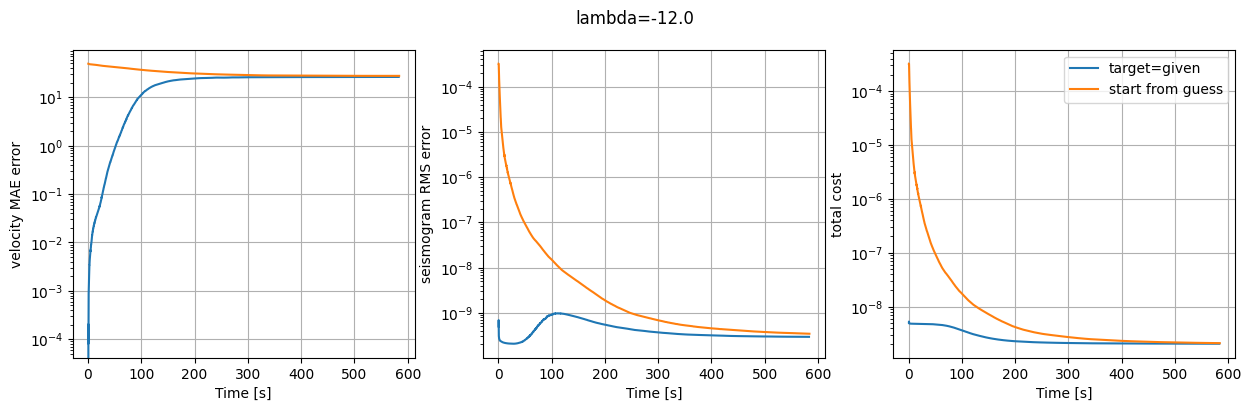

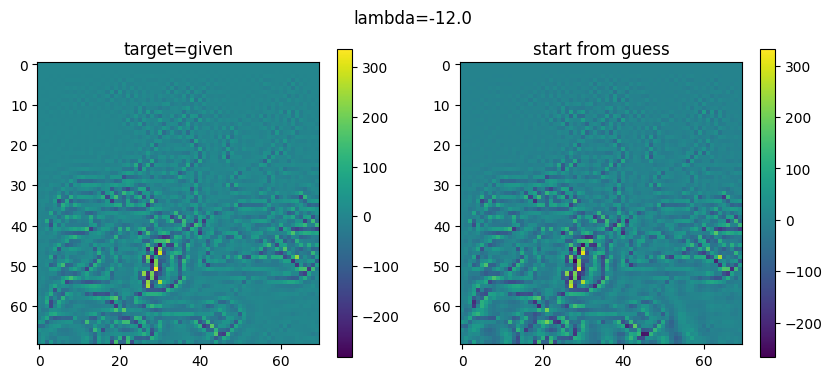

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.20it/s]


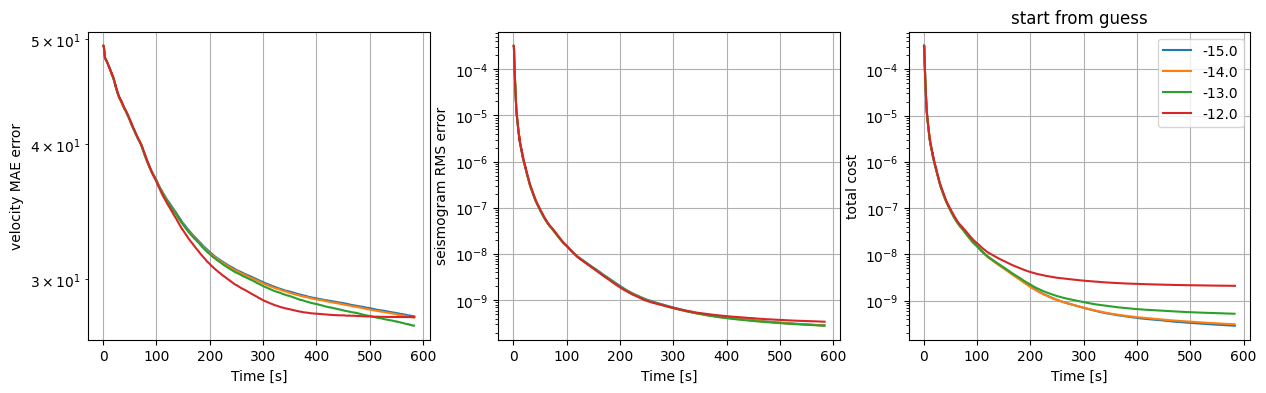

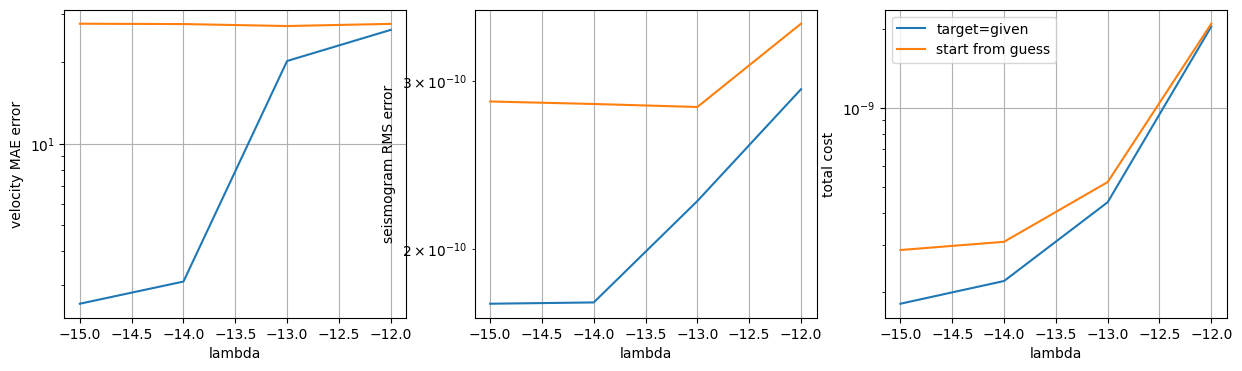

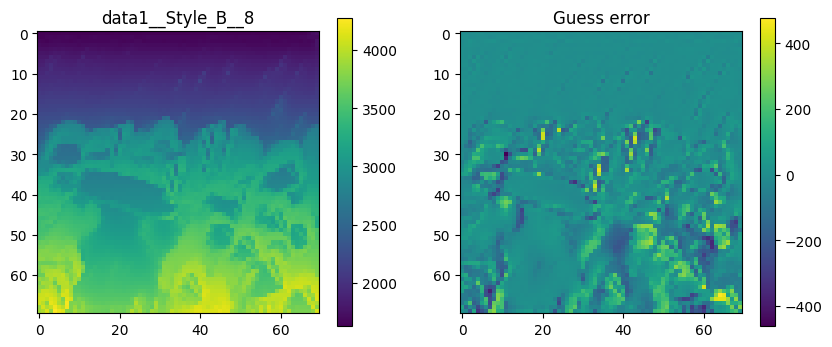

-15.0
diag 1.697693531163743e-05
diag 1.697693531163743e-05


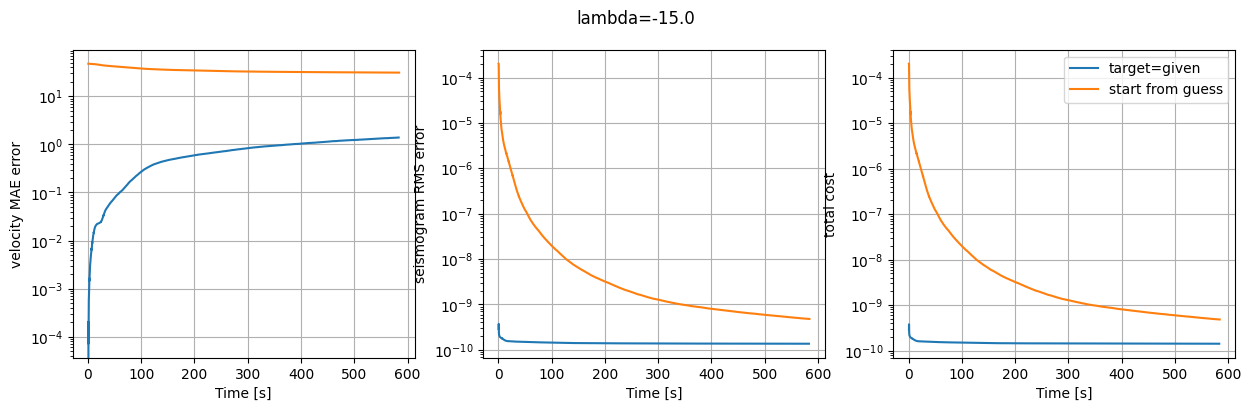

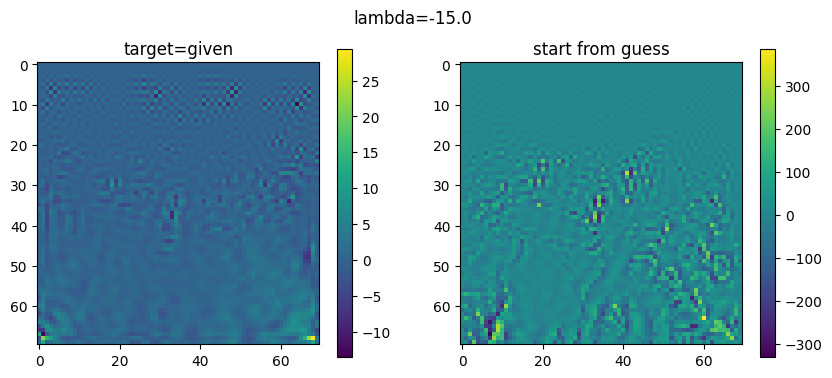

-14.0
diag 1.697693531163743e-05
diag 1.697693531163743e-05


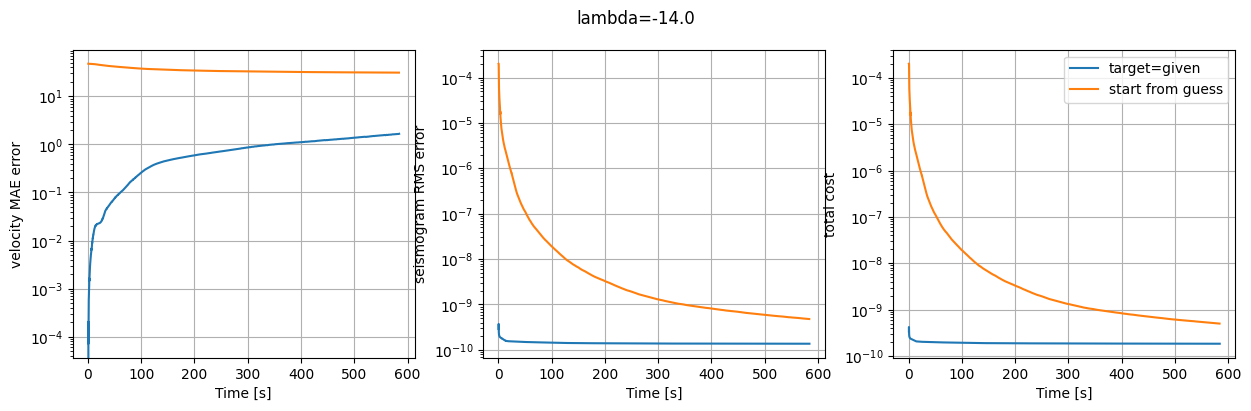

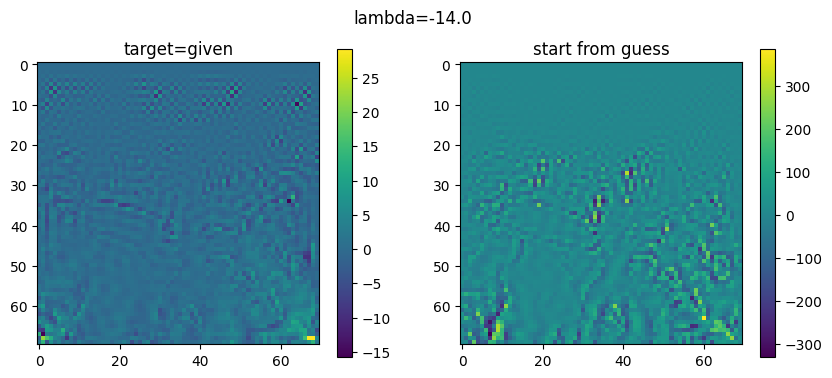

-13.0
diag 1.697693531163743e-05


In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_model.default_model().models[1].model_Style_B
model.show_convergence = True
model.iter_list = [3000]
#model.prior.noise = 0.6
model.prior.transform = False
model.prior.svd_cutoff = -1.
model.prior.λ = 10**-14

do_which_list = [False,True,True]

def param_func(model,value):
    print(value)
    model.prior.λ = 10**value
    return model
    
param_values = np.linspace(-15,-12,4)
param_name = "lambda"


for d in data[4500:]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)